## Predicting onset, progression, and clinical subtypes of Parkinson disease using machine learning

### Authors
Faraz Faghri<sup>1,2</sup>, Sayed Hadi Hashemi<sup>2</sup>, Hampton Leonard<sup>1</sup>, Sonja W. Scholz<sup>3,4</sup>, Roy H. Campbell<sup>2</sup>, Mike A. Nalls<sup>1,5</sup>, Andrew B. Singleton<sup>1</sup>


1 - Laboratory of Neurogenetics, National Institute on Aging, National Institutes of Health, Bethesda, MD, 20892, USA

2 - Department of Computer Science, University of Illinois Urbana-Champaign, Champaign, IL, 61820, USA

3 - Neurodegenerative Diseases Research Unit, National Institute of Neurological Disorders and Stroke, National Institutes of Health, Bethesda, MD, USA

4 - Department of Neurology, Johns Hopkins University School of Medicine, Baltimore, MD, USA

5 - Data Tecnica International, Glen Echo, MD, 20812, USA


### Abstract: 
The clinical manifestations of Parkinson disease are characterized by considerable heterogeneity in age at onset, disease duration, rate of progression, and constellation of motor versus nonmotor features. Due to these variable presentations, counseling of patients about their individual risks and prognosis is limited. There is an unmet need for predictive tests that allow early detection and characterization of distinct disease subgroups as well as improved, individualized predictions of the disease course. The emergence of machine learning to detect hidden patterns in complex, multi-dimensional datasets provides unparalleled opportunities to address this critical need. The development of such predictive models could have radical implications for clinical trial design, allocation of healthcare resources, patient counseling, and ultimately treatment. Here, we describe the implementation of machine learning techniques for the identification of distinct subgroups in Parkinson disease. Using machine learning on comprehensive, longitudinal clinical data from the Parkinson Disease Progression Marker Initiative (PPMI), we are able to delineate three distinct disease subgroups with highly predictable progression rates, corresponding to slow, moderate and fast progressors. We achieved highly accurate projections of disease progression three years from initial diagnosis (area under the curve of 0.956). We also validated our model in an independent cohort from the Parkinson Disease Biomarker Program (PDBP) and demonstrate robust prediction of subtypes in this replication step (area under the curve 0.787). These data-driven techniques enable clinicians to deconstruct the clinical heterogeneity within their patient cohorts. This knowledge could have immediate clinical implications by improving the detection of significant clinical outcomes that might have been masked by cohort heterogeneity. We anticipate that machine learning models, such as the ones described in this article, will improve patient counseling, clinical trial design and ultimately individualized clinical care.



### Usage:
To accompany the manuscript, and to help with replication and extension of our work, we have made the code publicly available for use by non-profit academic researchers (https://github.com/ffaghri1/PD-progression-ML)

## 1. Data load and cleansing

In [1]:
# loading libraries and settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

## loading data and selecting the necessary columns
cols = {} # column names
# Biospecimen Analysis
cols["biospecimen"] = ["PATNO", "CLINICAL_EVENT","TYPE", "TESTNAME", "TESTVALUE", "UNITS"]
# Medical
cols["pd_features"] = ["PATNO", "SXMO","SXYEAR", "PDDXDT"] # first symptom onset month, year, diagnosis date 
cols["pd_medication"] = ["PATNO", "EVENT_ID","PDMEDYN","ONLDOPA", "ONDOPAG", "ONOTHER"] # on medication, Levodopa, Dopamine Agonist, other
cols["vital_sign"] = ["PATNO", "EVENT_ID","WGTKG","HTCM"]
# Medical-Neurological Exam
cols["neuro_cranial"] = ["PATNO", "EVENT_ID","CN1RSP", "CN2RSP", "CN346RSP", "CN5RSP", "CN7RSP", "CN8RSP", "CN910RSP", "CN11RSP", "CN12RSP"]
# Medical-Safety Monitoring

# Motor Assessments
cols["updrs1"] = ["PATNO", "EVENT_ID", "INFODT", "NP1COG", "NP1HALL", "NP1DPRS", "NP1ANXS", "NP1APAT", "NP1DDS"]
cols["updrs1pq"] = ["PATNO", "EVENT_ID", "NP1SLPN", "NP1SLPD", "NP1PAIN", "NP1URIN", "NP1CNST", "NP1LTHD", "NP1FATG"]
cols["updrs2pq"] = ["PATNO", "EVENT_ID", "NP2SPCH", "NP2SALV", "NP2SWAL", "NP2EAT", "NP2DRES", "NP2HYGN", "NP2HWRT", "NP2HOBB", "NP2TURN", "NP2TRMR", "NP2RISE", "NP2WALK", "NP2FREZ"]
cols["updrs3_temp"] = ["PATNO", "EVENT_ID", "PAG_NAME", "CMEDTM", "EXAMTM", "NP3SPCH", "NP3FACXP", "NP3RIGN", "NP3RIGRU", "NP3RIGLU", "PN3RIGRL", "NP3RIGLL", "NP3FTAPR", "NP3FTAPL", "NP3HMOVR", "NP3HMOVL", "NP3PRSPR", "NP3PRSPL", "NP3TTAPR", "NP3TTAPL", "NP3LGAGR", "NP3LGAGL", "NP3RISNG", "NP3GAIT", "NP3FRZGT", "NP3PSTBL", "NP3POSTR", "NP3BRADY", "NP3PTRMR", "NP3PTRML", "NP3KTRMR", "NP3KTRML", "NP3RTARU", "NP3RTALU", "NP3RTARL", "NP3RTALL", "NP3RTALJ", "NP3RTCON", "DYSKPRES", "DYSKIRAT", "NHY", "ANNUAL_TIME_BTW_DOSE_NUPDRS", "ON_OFF_DOSE", "PD_MED_USE"]
cols["updrs3"] = ["PATNO", "EVENT_ID", "NP3SPCH", "NP3FACXP", "NP3RIGN", "NP3RIGRU", "NP3RIGLU", "PN3RIGRL", "NP3RIGLL", "NP3FTAPR", "NP3FTAPL", "NP3HMOVR", "NP3HMOVL", "NP3PRSPR", "NP3PRSPL", "NP3TTAPR", "NP3TTAPL", "NP3LGAGR", "NP3LGAGL", "NP3RISNG", "NP3GAIT", "NP3FRZGT", "NP3PSTBL", "NP3POSTR", "NP3BRADY", "NP3PTRMR", "NP3PTRML", "NP3KTRMR", "NP3KTRML", "NP3RTARU", "NP3RTALU", "NP3RTARL", "NP3RTALL", "NP3RTALJ", "NP3RTCON"]
cols["updrs4"] = ["PATNO", "EVENT_ID", "NP4WDYSK", "NP4DYSKI", "NP4OFF", "NP4FLCTI", "NP4FLCTX", "NP4DYSTN"]
cols["schwab"] = ["PATNO", "EVENT_ID", "MSEADLG"]
cols["pase_house"] = ["PATNO", "EVENT_ID", "LTHSWRK", "HVYHSWRK", "HMREPR", "LAWNWRK", "OUTGARDN", "CAREGVR", "WRKVL", "WRKVLHR", "WRKVLACT"]
# Non-motor Assessments
cols["benton"] = ["PATNO", "EVENT_ID", "JLO_TOTRAW"]
cols["cog_catg"] = ["PATNO", "EVENT_ID", "COGDECLN", "FNCDTCOG", "COGSTATE"]
cols["epworth"] = ["PATNO", "EVENT_ID", "ESS1", "ESS2", "ESS3", "ESS4", "ESS5", "ESS6", "ESS7", "ESS8"]
cols["geriatric"] = ["PATNO", "EVENT_ID", "GDSSATIS", "GDSDROPD", "GDSEMPTY", "GDSBORED", "GDSGSPIR", "GDSAFRAD", "GDSHAPPY", "GDSHLPLS", "GDSHOME", "GDSMEMRY", "GDSALIVE", "GDSWRTLS", "GDSENRGY", "GDSHOPLS", "GDSBETER"]
cols["geriatric_pos"] = [ "GDSDROPD", "GDSEMPTY", "GDSBORED", "GDSAFRAD", "GDSHLPLS", "GDSHOME", "GDSMEMRY", "GDSWRTLS", "GDSHOPLS", "GDSBETER"]
cols["geriatric_neg"] = [ "GDSSATIS", "GDSGSPIR", "GDSHAPPY", "GDSALIVE", "GDSENRGY"]
cols["hopkins_verbal"] = ["PATNO", "EVENT_ID", "HVLTRT1", "HVLTRT2", "HVLTRT3", "HVLTRDLY", "HVLTREC", "HVLTFPRL", "HVLTFPUN"]
cols["letter_seq"] = ["PATNO", "EVENT_ID","LNS_TOTRAW"]
cols["moca"] = ["PATNO", "EVENT_ID", "MCAALTTM", "MCACUBE", "MCACLCKC", "MCACLCKN", "MCACLCKH", "MCALION", "MCARHINO", "MCACAMEL", "MCAFDS", "MCABDS", "MCAVIGIL", "MCASER7", "MCASNTNC", "MCAVFNUM", "MCAVF", "MCAABSTR", "MCAREC1", "MCAREC2", "MCAREC3", "MCAREC4", "MCAREC5", "MCADATE", "MCAMONTH", "MCAYR", "MCADAY", "MCAPLACE", "MCACITY", "MCATOT"]
cols["moca_visuospatial"] = [ "MCAALTTM", "MCACUBE", "MCACLCKC", "MCACLCKN", "MCACLCKH"]
cols["moca_naming"] = [ "MCALION", "MCARHINO", "MCACAMEL"]
cols["moca_attention"] = [ "MCAFDS", "MCABDS", "MCAVIGIL", "MCASER7"]
cols["moca_language"] = [ "MCASNTNC", "MCAVF"]
cols["moca_delayed_recall"] = [ "MCAREC1", "MCAREC2", "MCAREC3", "MCAREC4", "MCAREC5"]
cols["moca_orientation"] = [ "MCADATE", "MCAMONTH", "MCAYR", "MCADAY", "MCAPLACE", "MCACITY"]
cols["upsit"] = [ "SUBJECT_ID", "SCENT_10_RESPONSE", "SCENT_09_RESPONSE", "SCENT_08_RESPONSE", "SCENT_07_RESPONSE", "SCENT_06_RESPONSE", "SCENT_05_RESPONSE", "SCENT_04_RESPONSE", "SCENT_03_RESPONSE", "SCENT_02_RESPONSE", "SCENT_01_RESPONSE", "SCENT_20_RESPONSE", "SCENT_19_RESPONSE", "SCENT_18_RESPONSE", "SCENT_17_RESPONSE", "SCENT_16_RESPONSE", "SCENT_15_RESPONSE", "SCENT_14_RESPONSE", "SCENT_13_RESPONSE", "SCENT_12_RESPONSE", "SCENT_11_RESPONSE", "SCENT_30_RESPONSE", "SCENT_29_RESPONSE", "SCENT_28_RESPONSE", "SCENT_27_RESPONSE", "SCENT_26_RESPONSE", "SCENT_25_RESPONSE", "SCENT_24_RESPONSE", "SCENT_23_RESPONSE", "SCENT_22_RESPONSE", "SCENT_21_RESPONSE", "SCENT_40_RESPONSE", "SCENT_39_RESPONSE", "SCENT_38_RESPONSE", "SCENT_37_RESPONSE", "SCENT_36_RESPONSE", "SCENT_35_RESPONSE", "SCENT_34_RESPONSE", "SCENT_33_RESPONSE", "SCENT_32_RESPONSE", "SCENT_31_RESPONSE", "SCENT_10_CORRECT", "SCENT_09_CORRECT", "SCENT_08_CORRECT", "SCENT_07_CORRECT", "SCENT_06_CORRECT", "SCENT_05_CORRECT", "SCENT_04_CORRECT", "SCENT_03_CORRECT", "SCENT_02_CORRECT", "SCENT_01_CORRECT", "SCENT_20_CORRECT", "SCENT_19_CORRECT", "SCENT_18_CORRECT", "SCENT_17_CORRECT", "SCENT_16_CORRECT", "SCENT_15_CORRECT", "SCENT_14_CORRECT", "SCENT_13_CORRECT", "SCENT_12_CORRECT", "SCENT_11_CORRECT", "SCENT_30_CORRECT", "SCENT_29_CORRECT", "SCENT_28_CORRECT", "SCENT_27_CORRECT", "SCENT_26_CORRECT", "SCENT_25_CORRECT", "SCENT_24_CORRECT", "SCENT_23_CORRECT", "SCENT_22_CORRECT", "SCENT_21_CORRECT", "SCENT_40_CORRECT", "SCENT_39_CORRECT", "SCENT_38_CORRECT", "SCENT_37_CORRECT", "SCENT_36_CORRECT", "SCENT_35_CORRECT", "SCENT_34_CORRECT", "SCENT_33_CORRECT", "SCENT_32_CORRECT", "SCENT_31_CORRECT", "TOTAL_CORRECT"]
cols["quip"] = [ "PATNO", "EVENT_ID", "TMGAMBLE", "CNTRLGMB", "TMSEX", "CNTRLSEX", "TMBUY", "CNTRLBUY", "TMEAT", "CNTRLEAT", "TMTORACT", "TMTMTACT", "TMTRWD" ]
cols["rem"] = [ "PATNO", "EVENT_ID", "DRMVIVID", "DRMAGRAC", "DRMNOCTB", "SLPLMBMV", "SLPINJUR", "DRMVERBL", "DRMFIGHT", "DRMUMV", "DRMOBJFL", "MVAWAKEN", "DRMREMEM", "SLPDSTRB", "STROKE", "HETRA", "RLS", "NARCLPSY", "DEPRS", "EPILEPSY", "BRNINFM" ]
cols["aut"] = [ "PATNO", "EVENT_ID", "SCAU1", "SCAU2", "SCAU3", "SCAU4", "SCAU5", "SCAU6", "SCAU7", "SCAU8", "SCAU9", "SCAU10", "SCAU11", "SCAU12", "SCAU13", "SCAU14", "SCAU15", "SCAU16", "SCAU17", "SCAU18", "SCAU19", "SCAU20", "SCAU21", "SCAU22", "SCAU23", "SCAU23A", "SCAU23AT", "SCAU24", "SCAU25", "SCAU26A", "SCAU26AT", "SCAU26B", "SCAU26BT", "SCAU26C", "SCAU26CT", "SCAU26D", "SCAU26DT" ]
cols["aut_gastrointestinal_up"] = [ "SCAU1", "SCAU2", "SCAU3" ]
cols["aut_gastrointestinal_down"] = [ "SCAU4", "SCAU5", "SCAU6", "SCAU7" ]
cols["aut_urinary"] = [ "SCAU8", "SCAU9", "SCAU10", "SCAU11", "SCAU12", "SCAU13" ] 
cols["aut_cardiovascular"] = [  "SCAU14", "SCAU15", "SCAU16" ]
cols["aut_thermoregulatory"] = [ "SCAU17", "SCAU18" ]
cols["aut_pupillomotor"] = [ "SCAU19" ]
cols["aut_skin"] = [ "SCAU20", "SCAU21" ]
cols["aut_sexual"] = [ "SCAU22", "SCAU23", "SCAU24", "SCAU25"] # 9 for NA, might skew the results signific for M/F better to remove
cols["semantic"] = [ "PATNO", "EVENT_ID", "VLTANIM", "VLTVEG", "VLTFRUIT" ]
cols["stai"] = [ "PATNO", "EVENT_ID", "STAIAD1", "STAIAD2", "STAIAD3", "STAIAD4", "STAIAD5", "STAIAD6", "STAIAD7", "STAIAD8", "STAIAD9", "STAIAD10", "STAIAD11", "STAIAD12", "STAIAD13", "STAIAD14", "STAIAD15", "STAIAD16", "STAIAD17", "STAIAD18", "STAIAD19", "STAIAD20", "STAIAD21", "STAIAD22", "STAIAD23", "STAIAD24", "STAIAD25", "STAIAD26", "STAIAD27", "STAIAD28", "STAIAD29", "STAIAD30", "STAIAD31", "STAIAD32", "STAIAD33", "STAIAD34", "STAIAD35", "STAIAD36", "STAIAD37", "STAIAD38", "STAIAD39", "STAIAD40" ]
cols["stai_a_state_pos"] = ["STAIAD3", "STAIAD4", "STAIAD6", "STAIAD7", "STAIAD9", "STAIAD12", "STAIAD13", "STAIAD14", "STAIAD17", "STAIAD18"]
cols["stai_a_state_neg"] = ["STAIAD1", "STAIAD2", "STAIAD5",  "STAIAD8", "STAIAD10", "STAIAD11", "STAIAD15", "STAIAD16", "STAIAD19", "STAIAD20"]
cols["stai_a_trait_pos"] = ["STAIAD22", "STAIAD24", "STAIAD25", "STAIAD28", "STAIAD29", "STAIAD31", "STAIAD32", "STAIAD35", "STAIAD37", "STAIAD38", "STAIAD40"]
cols["stai_a_trait_neg"] = ["STAIAD21", "STAIAD23", "STAIAD26", "STAIAD27", "STAIAD30", "STAIAD33", "STAIAD34", "STAIAD36", "STAIAD39"]
cols["sdm"] = [ "PATNO", "EVENT_ID", "SDMTOTAL"] 
cols["upsit_booklet"] = [ "PATNO", "EVENT_ID", "UPSITBK1", "UPSITBK2", "UPSITBK3", "UPSITBK4" ]
# Subject Characteristics
cols["family_history"] = ["PATNO", "BIOMOM", "BIOMOMPD", "BIODAD", "BIODADPD", "FULSIB", "FULSIBPD", "HAFSIB", "HAFSIBPD", "MAGPAR", "MAGPARPD", "PAGPAR", "PAGPARPD", "MATAU", "MATAUPD", "PATAU", "PATAUPD", "KIDSNUM", "KIDSPD"]
cols["status"] = ["PATNO", "RECRUITMENT_CAT", "IMAGING_CAT", "ENROLL_DATE", "ENROLL_CAT"]
cols["screening"] = ["PATNO", "BIRTHDT", "GENDER", "APPRDX", "CURRENT_APPRDX", "HISPLAT", "RAINDALS", "RAASIAN", "RABLACK", "RAHAWOPI", "RAWHITE", "RANOS"]
cols["socio"] = [ "PATNO", "EDUCYRS", "HANDED" ]
# Subject Enrollment
cols["primary_diag"] = [ "PATNO", "PRIMDIAG" ]

In [2]:
## data load
raw_datadir = '../../../../datasets/ppmi/raw_data_asof_2019Jan24/'
# Biospecimen Analysis - not used below
'''
biospecimen = pd.read_csv(raw_datadir + 'Current_Biospecimen_Analysis_Results.csv', index_col=["PATNO"], usecols=cols["biospecimen"])
biospecimen["CLINICAL_EVENT"].replace(['Baseline Collection', 'Screening Visit', 'Visit 01', 'Visit 02', 'Visit 03', 'Visit 04', 'Visit 05', 'Visit 06', 'Visit 07', 'Visit 08', 'Visit 09', 'Visit 10', 'Visit 11'], \
                            ['BL', 'SC', 'V01', 'V02', 'V03', 'V04', 'V06', 'V07', 'V08', 'V09', 'V10', 'V11', 'V12'], inplace=True)
biospecimen.rename(columns={'CLINICAL_EVENT':'EVENT_ID'}, inplace=True)
csf = biospecimen[(biospecimen["TYPE"] == 'Cerebrospinal fluid') & ~(biospecimen["TESTVALUE"] == "below detection limit")][["EVENT_ID", "TESTNAME", "TESTVALUE"]]
hemoglobin = csf[csf["TESTNAME"] == "CSF Hemoglobin"].reset_index().drop_duplicates(["PATNO","EVENT_ID","TESTNAME"]).set_index(['PATNO', 'EVENT_ID'])
alpha_syn = csf[csf["TESTNAME"] == "CSF Alpha-synuclein"].reset_index().drop_duplicates(["PATNO","EVENT_ID","TESTNAME"]).set_index(['PATNO', 'EVENT_ID'])
total_tau = csf[csf["TESTNAME"] == "Total tau"].reset_index().drop_duplicates(["PATNO","EVENT_ID","TESTNAME"]).set_index(['PATNO', 'EVENT_ID'])
abeta_42 = csf[csf["TESTNAME"] == "Abeta 42"].reset_index().drop_duplicates(["PATNO","EVENT_ID","TESTNAME"]).set_index(['PATNO', 'EVENT_ID'])
p_tau181p = csf[csf["TESTNAME"] == "p-Tau181P"].reset_index().drop_duplicates(["PATNO","EVENT_ID","TESTNAME"]).set_index(['PATNO', 'EVENT_ID'])
dna = biospecimen[(biospecimen["TYPE"] == 'DNA')][["EVENT_ID", "TESTNAME", "TESTVALUE"]]
rna = biospecimen[(biospecimen["TYPE"] == 'RNA')][["EVENT_ID", "TESTNAME", "TESTVALUE"]]
plasma = biospecimen[(biospecimen["TYPE"] == 'Plasma')][["EVENT_ID", "TESTNAME", "TESTVALUE"]]
serum = biospecimen[(biospecimen["TYPE"] == 'Serum')][["EVENT_ID", "TESTNAME", "TESTVALUE"]]
'''
# Medical
pd_start = pd.read_csv(raw_datadir + 'PD_Features.csv', index_col=["PATNO"], usecols=cols["pd_features"])
pd_medication = pd.read_csv(raw_datadir + 'Use_of_PD_Medication.csv', index_col=["PATNO", "EVENT_ID"], usecols=cols["pd_medication"])
vital_signs = pd.read_csv(raw_datadir + 'Vital_Signs.csv', index_col=["PATNO", "EVENT_ID"], usecols=cols["vital_sign"])
# Medical-Neurological Exam
neuro_cranial = pd.read_csv(raw_datadir + 'Neurological_Exam_-_Cranial_Nerves.csv', index_col=["PATNO", "EVENT_ID"], usecols=cols["neuro_cranial"])
# Medical-Safety Monitoring

# Motor Assessments
updrs1 = pd.read_csv(raw_datadir + 'MDS_UPDRS_Part_I.csv', index_col=["PATNO", "EVENT_ID"], parse_dates=["INFODT"], usecols=cols["updrs1"])
updrs1pq = pd.read_csv(raw_datadir + 'MDS_UPDRS_Part_I__Patient_Questionnaire.csv', index_col=["PATNO", "EVENT_ID"], usecols=cols["updrs1pq"])
updrs2pq = pd.read_csv(raw_datadir + 'MDS_UPDRS_Part_II__Patient_Questionnaire.csv', index_col=["PATNO", "EVENT_ID"], usecols=cols["updrs2pq"])
updrs3_temp = pd.read_csv(raw_datadir + 'MDS_UPDRS_Part_III.csv', index_col=["PATNO", "EVENT_ID"], usecols=cols["updrs3_temp"])
updrs3 = updrs3_temp[updrs3_temp.PAG_NAME == 'NUPDRS3'] # before dose
updrs3a = updrs3_temp[updrs3_temp.PAG_NAME == 'NUPDRS3A'] # after dose 
updrs4 = pd.read_csv(raw_datadir + 'MDS_UPDRS_Part_IV.csv', index_col=["PATNO", "EVENT_ID"], usecols=cols["updrs4"])
schwab = pd.read_csv(raw_datadir + 'Modified_Schwab_+_England_ADL.csv', index_col=["PATNO", "EVENT_ID"], usecols=cols["schwab"])
pase_house = pd.read_csv(raw_datadir + 'PASE_-_Household_Activity.csv', index_col=["PATNO", "EVENT_ID"], usecols=cols["pase_house"])
# Non-motor Assessments
benton = pd.read_csv(raw_datadir + 'Benton_Judgment_of_Line_Orientation.csv', index_col=["PATNO", "EVENT_ID"], usecols=cols["benton"])
cog_catg = pd.read_csv(raw_datadir + 'Cognitive_Categorization.csv', index_col=["PATNO", "EVENT_ID"], usecols=cols["cog_catg"])
epworth = pd.read_csv(raw_datadir + 'Epworth_Sleepiness_Scale.csv', index_col=["PATNO", "EVENT_ID"], usecols=cols["epworth"])
geriatric = pd.read_csv(raw_datadir + 'Geriatric_Depression_Scale__Short_.csv', index_col=["PATNO", "EVENT_ID"], usecols=cols["geriatric"])
geriatric["total_pos"] = geriatric[cols["geriatric_pos"]].sum(axis=1)
geriatric["total_neg"] = geriatric[cols["geriatric_neg"]].sum(axis=1)
geriatric["total"] = geriatric["total_pos"] + 5 - geriatric["total_neg"]
geriatric = geriatric["total"] # drop the rest
hopkins_verbal = pd.read_csv(raw_datadir + 'Hopkins_Verbal_Learning_Test.csv', index_col=["PATNO", "EVENT_ID"], usecols=cols["hopkins_verbal"])
letter_seq = pd.read_csv(raw_datadir + 'Letter_-_Number_Sequencing__PD_.csv', index_col=["PATNO", "EVENT_ID"], usecols=cols["letter_seq"])
moca = pd.read_csv(raw_datadir + 'Montreal_Cognitive_Assessment__MoCA_.csv', index_col=["PATNO", "EVENT_ID"], usecols=cols["moca"])
moca["visuospatial"] = moca[cols["moca_visuospatial"]].sum(axis=1)
moca["naming"] = moca[cols["moca_naming"]].sum(axis=1)
moca["attention"] = moca[cols["moca_attention"]].sum(axis=1)
moca["language"] = moca[cols["moca_language"]].sum(axis=1)
moca["delayed_recall"] = moca[cols["moca_delayed_recall"]].sum(axis=1)
moca = moca[["visuospatial", "naming", "attention", "language", "delayed_recall", "MCAABSTR", "MCAVFNUM", "MCATOT"]] # drop extra
upsit = pd.read_csv(raw_datadir + 'Olfactory_UPSIT.csv', index_col=["SUBJECT_ID"], usecols=cols["upsit"])
quip = pd.read_csv(raw_datadir + 'QUIP_Current_Short.csv', index_col=["PATNO", "EVENT_ID"], usecols=cols["quip"])
rem = pd.read_csv(raw_datadir + 'REM_Sleep_Disorder_Questionnaire.csv', index_col=["PATNO", "EVENT_ID"], usecols=cols["rem"])
aut = pd.read_csv(raw_datadir + 'SCOPA-AUT.csv', index_col=["PATNO", "EVENT_ID"], usecols=cols["aut"])
aut["gastrointestinal_up"] = aut[cols["aut_gastrointestinal_up"]].sum(axis=1)
aut["gastrointestinal_down"] = aut[cols["aut_gastrointestinal_down"]].sum(axis=1)
aut["urinary"] = aut[cols["aut_urinary"]].sum(axis=1)
aut["cardiovascular"] = aut[cols["aut_cardiovascular"]].sum(axis=1)
aut["thermoregulatory"] = aut[cols["aut_thermoregulatory"]].sum(axis=1)
aut["pupillomotor"] = aut[cols["aut_pupillomotor"]].sum(axis=1)
aut["skin"] = aut[cols["aut_skin"]].sum(axis=1)
# aut["sexual"] = aut[cols["aut_sexual"]].sum(axis=1) # NA is assigned as 9, throwing things off, in case adding it, edit the next line too
aut = aut[["gastrointestinal_up", "gastrointestinal_down", "urinary", "cardiovascular", "thermoregulatory", "pupillomotor", "skin"]]#, "sexual"]]
semantic = pd.read_csv(raw_datadir + 'Semantic_Fluency.csv', index_col=["PATNO", "EVENT_ID"], usecols=cols["semantic"])
stai = pd.read_csv(raw_datadir + 'State-Trait_Anxiety_Inventory.csv', index_col=["PATNO", "EVENT_ID"], usecols=cols["stai"])
stai["a_state"] = stai[cols["stai_a_state_pos"]].sum(axis=1) + (5 * len(cols["stai_a_state_neg"]) - stai[cols["stai_a_state_neg"]].sum(axis=1))
stai["a_trait"] = stai[cols["stai_a_trait_pos"]].sum(axis=1) + (5 * len(cols["stai_a_trait_neg"]) - stai[cols["stai_a_trait_neg"]].sum(axis=1))
stai = stai[["a_state", "a_trait"]]
sdm = pd.read_csv(raw_datadir + 'Symbol_Digit_Modalities.csv', index_col=["PATNO", "EVENT_ID"], usecols=cols["sdm"])
upsit_booklet = pd.read_csv(raw_datadir + 'University_of_Pennsylvania_Smell_ID_Test.csv', index_col=["PATNO", "EVENT_ID"], usecols=cols["upsit_booklet"])
# Subject Characteristics
family_history = pd.read_csv(raw_datadir + 'Family_History__PD_.csv', index_col=["PATNO"], usecols=cols["family_history"])
status = pd.read_csv(raw_datadir + 'Patient_Status.csv', index_col=["PATNO"], usecols=cols["status"])
screening = pd.read_csv(raw_datadir + 'Screening___Demographics.csv', index_col=["PATNO"], usecols=cols["screening"])
socio = pd.read_csv(raw_datadir + 'Socio-Economics.csv', index_col=["PATNO"], usecols=cols["socio"])
# Subject Enrollment
primary_diag = pd.read_csv(raw_datadir + 'Primary_Diagnosis.csv', index_col=["PATNO"], usecols=cols["primary_diag"])

constructing the merged matrix:

In [3]:
# Edit: check format using only a few features
raw_datadir = '../../../../datasets/ppmi/raw_data_asof_2019Jan24/'
updrs2pq = pd.read_csv(raw_datadir + 'MDS_UPDRS_Part_II__Patient_Questionnaire.csv', index_col=["PATNO", "EVENT_ID"], usecols=cols["updrs2pq"])
moca = pd.read_csv(raw_datadir + 'Montreal_Cognitive_Assessment__MoCA_.csv', index_col=["PATNO", "EVENT_ID"], usecols=cols["moca"])
status = pd.read_csv(raw_datadir + 'Patient_Status.csv', index_col=["PATNO"], usecols=cols["status"])
screening = pd.read_csv(raw_datadir + 'Screening___Demographics.csv', index_col=["PATNO"], usecols=cols["screening"])


In [4]:
# datasets and visits of interest, limiting the progression to 36 months (visit 06)
datasets_of_interest = ['neuro_cranial', 'updrs1', 'updrs1pq', 'updrs2pq', 'updrs3', 'benton', 'epworth', 
                        'geriatric', 'hopkins_verbal', 'letter_seq', 'moca', 'quip', 'rem', 'aut', 'semantic', 'stai', 'sdm']
#datasets_of_interest = ['updrs2pq', 'moca']
visits_of_interest = ['BL', 'V02', 'V04', 'V05', 'V06', 'V07', 'V08', 'V09', 'V10']#, 'V08']#, 'V09', 'V10', 'V11', 'V12'] #'V01', 'V05', 'V07'
last_visit = visits_of_interest[-1]

# selecting participants with data from BL to last_visit
dataset_first_noindx = eval(datasets_of_interest[0]).reset_index()
patno_filtered_visited = dataset_first_noindx[ dataset_first_noindx.EVENT_ID == last_visit ]['PATNO']

for dataset in datasets_of_interest[1:]:
    dataset_noindx = eval(dataset).reset_index()
    temp_patno = dataset_noindx[ dataset_noindx.EVENT_ID == last_visit ]['PATNO']
    
    patno_filtered_visited = patno_filtered_visited[ patno_filtered_visited.isin(temp_patno) ]

# constructing the data_visits dictionary with all the information
data_visits = {}
status_o = status[status.index.isin(patno_filtered_visited)].ENROLL_CAT
screening_o = screening[screening.index.isin(patno_filtered_visited)]
data_visits["info"] = pd.concat([status_o, screening_o], axis=1)

for dataset in datasets_of_interest:    
    dataset_noindx = eval(dataset).reset_index()
    data_visits[dataset] = dataset_noindx[ dataset_noindx['PATNO'].isin(patno_filtered_visited) & dataset_noindx['EVENT_ID'].isin(visits_of_interest) ]

In [5]:
data_visits['info']

,ENROLL_CAT,APPRDX,CURRENT_APPRDX,BIRTHDT,GENDER,HISPLAT,RAINDALS,RAASIAN,RABLACK,RAHAWOPI,RAWHITE,RANOS
PATNO,,,,,,,,,,,,
3000,HC,2.0,2.0,1941.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3001,PD,1.0,1.0,1946.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3002,PD,1.0,1.0,1943.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3003,PD,1.0,1.0,1954.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3004,HC,2.0,2.0,1951.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3008,HC,2.0,2.0,1929.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3009,HC,2.0,2.0,1927.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3010,PD,1.0,1.0,1964.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3012,PD,1.0,1.0,1953.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 2. Data exploration

Let's see what percentage of selected participants are __PD__, __SWEDD__, __Healthy Control__, and how the __gender__ and __birthdate__ looks like:

ENROLL_CAT
GENPD        42
GENUN        24
HC          159
PD          305
PRODROMA     38
REGPD         1
SWEDD         2
dtype: int64

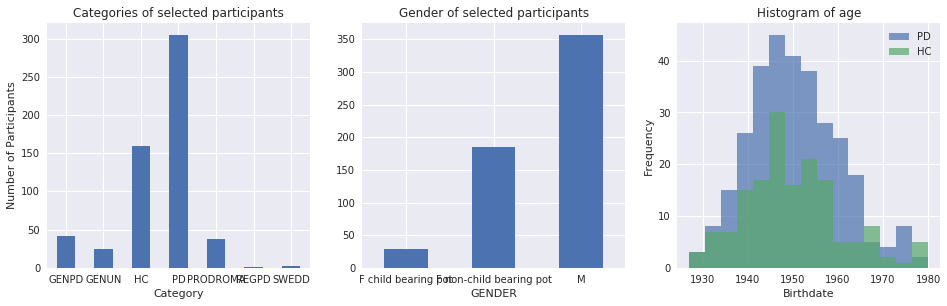

In [6]:
plt.figure(1, figsize=(16, 4.5))

# plot the categories distribution
plt.subplot(1,3,1)
plot_1 = data_visits["info"].ENROLL_CAT.reset_index().groupby("ENROLL_CAT").size().plot(kind='bar', title="Categories of selected participants", rot=0, ax=plt.gca())
plot_1.set_ylabel("Number of Participants"); plot_1.set_xlabel("Category");

# plot the gender distribution
plt.subplot(1,3,2)
data_visits["info"].GENDER.replace([0, 1, 2], ['F child bearing pot', 'F non-child bearing pot', 'M']).reset_index().groupby("GENDER").size().plot(kind='bar', title="Gender of selected participants", rot=0, ax=plt.gca());

# plot the age histogram
plt.subplot(1,3,3)
hc_birthdt = data_visits["info"].BIRTHDT.reset_index()[data_visits["info"].reset_index()['ENROLL_CAT'] == 'HC'].rename(columns={'BIRTHDT':'HC'})
pd_birthdt = data_visits["info"].BIRTHDT.reset_index()[data_visits["info"].reset_index()['ENROLL_CAT'] == 'PD'].rename(columns={'BIRTHDT':'PD'})
concat_birthdt = pd.concat([pd_birthdt.PD, hc_birthdt.HC], axis=1)
plot_3 = concat_birthdt.plot(kind='hist', title="Histogram of age", alpha=0.7, bins=15, ax=plt.gca())
plot_3.set_xlabel("Birthdate");
data_visits["info"].ENROLL_CAT.reset_index().groupby("ENROLL_CAT").size()

### 2.1. Stats for Table 1 paper

In [7]:
data_visits["info"].GENDER.reset_index()[data_visits["info"].reset_index()['ENROLL_CAT'] == 'PD'].replace([0, 1, 2], ['F child bearing pot', 'F non-child bearing pot', 'M']).reset_index().groupby("GENDER").size()

GENDER
F child bearing pot         16
F non-child bearing pot     86
M                          203
dtype: int64

## 3. Vectorizing time-series data into one series

Dropping non-progression related columns:

In [8]:
# Edit: vectorize only a few features to see format for now
t3 = data_visits['updrs2pq'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t6 = data_visits['moca'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)

M = pd.concat([t3, t6], axis=1).interpolate(method='linear', axis=1, limit=10, limit_direction='both')


In [9]:
M

NP2SPCH                                         NP2SALV  ... MCACITY  \
EVENT_ID      BL  V02  V04  V05  V06  V07  V08  V09  V10      BL  ...     V05   
PATNO                                                             ...           
3000         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  ...     1.0   
3001         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  ...     1.0   
3002         1.0  1.5  2.0  1.0  1.0  1.0  1.0  1.0  2.0     2.0  ...     1.0   
3003         0.0  0.0  0.0  1.0  2.0  2.0  2.0  2.0  2.0     0.0  ...     1.0   
3004         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  ...     1.0   
3008         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  ...     1.0   
3009         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  ...     1.0   
3010         1.0  2.0  2.0  3.0  3.0  3.0  2.0  3.0  2.0     3.0  ...     1.0   
3012         1.0  1.5  2.0  1.0  3.0  2.0  3.0  3.0  2.0     1.0  ...     1.0   
3013         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     2.0  ...     1.0   
3018         0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0     2.0  ...     1.0   
3023         0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  ...     1.0   
3050         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  ...     1.0   
3051         2.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0     1.0  ...     1.0   
3052         0.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0     0.0  ...     1.0   
3053         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  ...     1.0   
3054         0.0  1.0  2.0  1.0  2.0  1.0  1.0  2.0  1.0     0.0  ...     1.0   
3055         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  ...     1.0   
3056         2.0  2.5  3.0  2.0  3.0  3.0  2.0  3.0  3.0     2.0  ...     1.0   
3057         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  ...     1.0   
3058         2.0  3.0  2.0  2.0  2.0  2.0  2.0  2.0  3.0     4.0  ...     1.0   
3059         2.0  1.0  0.0  2.0  2.0  2.0  2.0  2.0  3.0     1.0  ...     1.0   
3060         2.0  2.0  2.0  1.5  1.0  0.0  2.0  2.0  0.0     2.0  ...     1.0   
3061         0.0  0.0  0.0  0.0  0.0  1.0  1.0  2.0  1.0     0.0  ...     1.0   
3062         0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0     0.0  ...     1.0   
3064         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  ...     1.0   
3066         0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0     0.0  ...     1.0   
3067         1.0  2.0  3.0  2.0  2.0  2.0  2.0  2.0  2.0     0.0  ...     1.0   
3068         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  ...     1.0   
3069         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  ...     1.0   
...          ...  ...  ...  ...  ...  ...  ...  ...  ...     ...  ...     ...   
60002        1.0  0.0  1.0  2.0  1.0  1.0  1.0  1.0  1.0     2.0  ...     1.0   
60003        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  ...     1.0   
60004        0.0  0.0  0.0  0.0  1.0  0.0  2.0  3.0  2.0     0.0  ...     1.0   
60013        0.0  0.0  0.0  0.0  0.0  1.0  1.0  2.0  2.0     2.0  ...     1.0   
60015        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  ...     1.0   
60023        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  ...     1.0   
60024        1.0  1.0  1.0  2.0  1.0  2.0  2.0  3.0  2.0     0.0  ...     1.0   
60035        0.0  0.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0     0.0  ...     1.0   
60036        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  ...     1.0   
60044        2.0  2.0  1.0  2.0  2.0  2.0  1.0  2.0  2.0     1.0  ...     1.0   
60045        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     2.0  ...     1.0   
60046        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  ...     1.0   
60048        0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  2.0     0.0  ...     1.0   
60056        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  ...     1.0   
60057        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     2.0  ...     1.0   
60059        0.0  0.0  0.0  0.0  0.0  0.

In [103]:
temp_sdm = data_visits['sdm'][data_visits['sdm'].EVENT_ID.isin(set(visits_of_interest)) ]#.drop('INFODT',axis=1)
temp_bl_sdm = temp_sdm.loc[temp_sdm['EVENT_ID']=='BL']
temp_v10_sdm = temp_sdm.loc[temp_sdm['EVENT_ID']=='V10']
nan_bl_sdm = set(temp_bl_sdm.loc[pd.isnull(temp_bl_sdm['SDMTOTAL'])].PATNO.values)
print(len(nan_bl_sdm))
nan_v10_sdm = set(temp_v10_sdm.loc[pd.isnull(temp_v10_sdm['SDMTOTAL'])].PATNO.values)
print(len(nan_v10_sdm))
# assume first and last not null so linear interpolation (average between before + after works fine)

0
0


In [101]:
# check t8 before and after interpolation - shouldn't be interpolating through next patient
temp_t1 = data_visits['updrs1'][data_visits['updrs1'].EVENT_ID.isin(set(visits_of_interest)) ].drop('INFODT',axis=1).set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO')
temp_t1 = temp_t1.unstack().reset_index().set_index('PATNO')
with pd.option_context('display.max_columns', None):
    display(temp_t1.head())
temp_t1 = temp_t1.interpolate(method='linear', axis=1)
with pd.option_context('display.max_columns', None):
    display(temp_t1.head())



NP1COG                                         NP1HALL            \
EVENT_ID     BL  V02  V04  V05  V06  V07  V08  V09  V10      BL  V02  V04   
PATNO                                                                       
3000        1.0  NaN  0.0  NaN  1.0  NaN  1.0  NaN  0.0     0.0  NaN  0.0   
3001        0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0   
3002        1.0  NaN  1.0  1.0  2.0  1.0  1.0  2.0  1.0     0.0  NaN  0.0   
3003        0.0  0.0  0.0  NaN  0.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0   
3004        0.0  NaN  0.0  NaN  0.0  NaN  1.0  NaN  0.0     0.0  NaN  0.0   

                                       NP1DPRS                                \
EVENT_ID  V05  V06  V07  V08  V09  V10      BL  V02  V04  V05  V06  V07  V08   
PATNO                                                                          
3000      NaN  0.0  NaN  0.0  NaN  0.0     1.0  NaN  1.0  NaN  1.0  NaN  0.0   
3001      0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  0.0  0.0  0.0  0.0   
3002      1.0  0.0  0.0  0.0  0.0  1.0     1.0  NaN  1.0  1.0  3.0  1.0  1.0   
3003      NaN  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  NaN  0.0  0.0  0.0   
3004      NaN  0.0  NaN  0.0  NaN  0.0     0.0  NaN  0.0  NaN  0.0  NaN  0.0   

                   NP1ANXS                                         NP1APAT  \
EVENT_ID  V09  V10      BL  V02  V04  V05  V06  V07  V08  V09  V10      BL   
PATNO                                                                        
3000      NaN  0.0     1.0  NaN  0.0  NaN  1.0  NaN  2.0  NaN  0.0     0.0   
3001      1.0  0.0     0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0     0.0   
3002      0.0  0.0     0.0  NaN  1.0  1.0  1.0  1.0  2.0  1.0  2.0     1.0   
3003      0.0  0.0     1.0  0.0  0.0  NaN  0.0  2.0  2.0  0.0  0.0     0.0   
3004      NaN  0.0     0.0  NaN  0.0  NaN  1.0  NaN  0.0  NaN  0.0     0.0   

                                                 NP1DDS                      \
EVENT_ID  V02  V04  V05  V06  V07  V08  V09  V10     BL  V02  V04  V05  V06   
PATNO                                                                         
3000      NaN  0.0  NaN  0.0  NaN  0.0  NaN  0.0    0.0  NaN  0.0  NaN  0.0   
3001      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0   
3002      NaN  0.0  0.0  2.0  1.0  0.0  2.0  0.0    0.0  NaN  0.0  0.0  0.0   
3003      0.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  NaN  0.0   
3004      NaN  0.0  NaN  0.0  NaN  0.0  NaN  0.0    0.0  NaN  0.0  NaN  0.0   

                              
EVENT_ID  V07  V08  V09  V10  
PATNO                         
3000      NaN  0.0  NaN  0.0  
3001      0.0  0.0  0.0  0.0  
3002      0.0  0.0  1.0  1.0  
3003      0.0  0.0  0.0  0.0  
3004      NaN  0.0  NaN  0.0

NP1COG                                         NP1HALL            \
EVENT_ID     BL  V02  V04  V05  V06  V07  V08  V09  V10      BL  V02  V04   
PATNO                                                                       
3000        1.0  0.5  0.0  0.5  1.0  1.0  1.0  0.5  0.0     0.0  0.0  0.0   
3001        0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0   
3002        1.0  1.0  1.0  1.0  2.0  1.0  1.0  2.0  1.0     0.0  0.0  0.0   
3003        0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0   
3004        0.0  0.0  0.0  0.0  0.0  0.5  1.0  0.5  0.0     0.0  0.0  0.0   

                                       NP1DPRS                                \
EVENT_ID  V05  V06  V07  V08  V09  V10      BL  V02  V04  V05  V06  V07  V08   
PATNO                                                                          
3000      0.0  0.0  0.0  0.0  0.0  0.0     1.0  1.0  1.0  1.0  1.0  0.5  0.0   
3001      0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  0.0  0.0  0.0  0.0   
3002      1.0  0.0  0.0  0.0  0.0  1.0     1.0  1.0  1.0  1.0  3.0  1.0  1.0   
3003      0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3004      0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                   NP1ANXS                                         NP1APAT  \
EVENT_ID  V09  V10      BL  V02  V04  V05  V06  V07  V08  V09  V10      BL   
PATNO                                                                        
3000      0.0  0.0     1.0  0.5  0.0  0.5  1.0  1.5  2.0  1.0  0.0     0.0   
3001      1.0  0.0     0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0     0.0   
3002      0.0  0.0     0.0  0.5  1.0  1.0  1.0  1.0  2.0  1.0  2.0     1.0   
3003      0.0  0.0     1.0  0.0  0.0  0.0  0.0  2.0  2.0  0.0  0.0     0.0   
3004      0.0  0.0     0.0  0.0  0.0  0.5  1.0  0.5  0.0  0.0  0.0     0.0   

                                                 NP1DDS                      \
EVENT_ID  V02  V04  V05  V06  V07  V08  V09  V10     BL  V02  V04  V05  V06   
PATNO                                                                         
3000      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0   
3001      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0   
3002      0.5  0.0  0.0  2.0  1.0  0.0  2.0  0.0    0.0  0.0  0.0  0.0  0.0   
3003      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0   
3004      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0   

                              
EVENT_ID  V07  V08  V09  V10  
PATNO                         
3000      0.0  0.0  0.0  0.0  
3001      0.0  0.0  0.0  0.0  
3002      0.0  0.0  1.0  1.0  
3003      0.0  0.0  0.0  0.0  
3004      0.0  0.0  0.0  0.0

In [16]:


t1 = data_visits['updrs1'][data_visits['updrs1'].EVENT_ID.isin(set(visits_of_interest)) ].drop('INFODT',axis=1).set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t2 = data_visits['updrs1pq'][data_visits['updrs1pq'].EVENT_ID.isin(set(visits_of_interest)) ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t3 = data_visits['updrs2pq'][data_visits['updrs2pq'].EVENT_ID.isin(set(visits_of_interest)) ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t4 = data_visits['updrs3'][data_visits['updrs3'].EVENT_ID.isin(set(visits_of_interest)) ].drop(['PAG_NAME','CMEDTM','EXAMTM','PD_MED_USE','ON_OFF_DOSE','ANNUAL_TIME_BTW_DOSE_NUPDRS'],axis=1).set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t5 = data_visits['epworth'][data_visits['epworth'].EVENT_ID.isin(set(visits_of_interest)) ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t6 = data_visits['moca'][data_visits['moca'].EVENT_ID.isin(set(visits_of_interest)) ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t7 = data_visits['benton'][data_visits['benton'].EVENT_ID.isin(set(visits_of_interest)) ].drop_duplicates(['PATNO','EVENT_ID'], keep='first').set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t8 = data_visits['neuro_cranial'][data_visits['neuro_cranial'].EVENT_ID.isin(set(visits_of_interest)) ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t9 = data_visits['geriatric'][data_visits['geriatric'].EVENT_ID.isin(set(visits_of_interest)) ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
t10 = data_visits['hopkins_verbal'][data_visits['hopkins_verbal'].EVENT_ID.isin(set(visits_of_interest)) ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
t11 = data_visits['letter_seq'][data_visits['letter_seq'].EVENT_ID.isin(set(visits_of_interest)) ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
t12 = data_visits['quip'][data_visits['quip'].EVENT_ID.isin(set(visits_of_interest)) ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
t13 = data_visits['rem'][data_visits['rem'].EVENT_ID.isin(set(visits_of_interest)) ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
t14 = data_visits['aut'][data_visits['aut'].EVENT_ID.isin(set(visits_of_interest)) ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
t15 = data_visits['semantic'][data_visits['semantic'].EVENT_ID.isin(set(visits_of_interest)) ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
t16 = data_visits['stai'][data_visits['stai'].EVENT_ID.isin(set(visits_of_interest)) ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
t17 = data_visits['sdm'][data_visits['sdm'].EVENT_ID.isin(set(visits_of_interest)) ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')

## ones with high number being better:
# moca, benton, hopkins_verbal, letter_seq, semantic

## The following will be added only for PD analysis 
# only PD
# t10 = data_visits['updrs3a'].drop(['PAG_NAME','CMEDTM','EXAMTM','PD_MED_USE','ON_OFF_DOSE','ANNUAL_TIME_BTW_DOSE_NUPDRS'],axis=1).set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
# t11 = data_visits['updrs4'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
# t12 = data_visits['schwab'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)

# chores
# t15 = data_visits['pase_house'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)

M = pd.concat([t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12, t13, t14, t15, t16, t17], axis=1).interpolate(method='linear', axis=1, limit=10, limit_direction='both')

In [29]:
with pd.option_context('display.max_rows', None):
    display(M)
# no nans, just over half as many patients tho

NP1COG                                                              \
EVENT_ID     BL       V02       V04       V05       V06       V07       V08   
PATNO                                                                         
3000        1.0  0.500000  0.000000  0.500000  1.000000  1.000000  1.000000   
3001        0.0  0.000000  1.000000  0.000000  0.000000  0.000000  0.000000   
3002        1.0  1.000000  1.000000  1.000000  2.000000  1.000000  1.000000   
3003        0.0  0.000000  0.000000  0.000000  0.000000  1.000000  0.000000   
3004        0.0  0.000000  0.000000  0.000000  0.000000  0.500000  1.000000   
3008        0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3009        0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3010        1.0  1.000000  0.000000  1.000000  0.000000  0.000000  1.000000   
3012        1.0  1.000000  1.000000  1.000000  1.000000  1.000000  2.000000   
3013        0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3018        1.0  0.000000  0.000000  0.000000  0.000000  1.000000  1.000000   
3023        1.0  1.000000  0.000000  1.000000  1.000000  2.000000  1.000000   
3050        0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3051        0.0  0.000000  0.000000  0.000000  0.000000  0.000000  1.000000   
3052        2.0  0.000000  1.000000  1.000000  0.000000  0.000000  0.000000   
3053        0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3054        1.0  1.000000  1.000000  1.000000  2.000000  1.000000  1.000000   
3055        1.0  0.500000  0.000000  0.500000  1.000000  1.000000  1.000000   
3056        0.0  1.000000  2.000000  2.000000  1.000000  0.000000  1.000000   
3057        1.0  0.500000  0.000000  0.500000  1.000000  0.500000  0.000000   
3058        0.0  1.000000  1.000000  1.000000  0.000000  1.000000  2.000000   
3059        1.0  0.000000  0.000000  0.000000  2.000000  2.000000  1.000000   
3060        1.0  0.000000  2.000000  1.500000  1.000000  1.000000  1.000000   
3061        1.0  0.000000  0.000000  2.000000  1.000000  1.000000  3.000000   
3062        0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3064        0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3066        0.0  0.000000  0.000000  0.000000  0.000000  1.000000  0.000000   
3067        1.0  0.000000  0.000000  1.000000  0.000000  0.000000  0.000000   
3068        0.0  0.000000  1.000000  0.000000  0.000000  1.000000  2.000000   
3069        0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3071        0.0  0.000000  0.000000  0.500000  1.000000  0.500000  0.000000   
3072        0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3073        1.0  0.500000  0.000000  0.000000  0.000000  0.000000  0.000000   
3074        0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3075        1.0  1.000000  1.000000  1.000000  1.000000  0.500000  0.000000   
3076        2.0  2.000000  3.000000  3.000000  3.000000  4.000000  4.000000   
3077        2.0  2.000000  2.000000  2.000000  1.000000  2.000000  1.000000   
3078        0.0  1.000000  1.000000  1.000000  0.000000  0.000000  0.000000   
3080        0.0  1.000000  2.000000  1.000000  1.000000  2.000000  2.000000   
3083        0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3085        0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3086        0.0  0.000000  1.000000  0.000000  0.000000  0.000000  1.000000   
3087        1.0  0.500000  0.000000  0.500000  1.000000  1.000000  1.000000   
3088        0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3089        0.0  0.000000  0.000000  0.000000  1.000000  0.000000  0.000000   
3100        0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3102        0.0  0.000000  1.000000  2.000000  2.000000  2.000000  2.000000   
3105        0.0  0.500000  1.000000  1.000000  1.000000  0.

## 4. Normalization

Evaluating both z-score and min-max normalizations:

In [30]:
# normalize values based on z-score
data_visits_zs = {}
for i in range(1, len(datasets_of_interest) + 1):
    dataset = 't' + str(i)
    dataset_columns = eval(dataset).columns.levels[0][0:-1]
    
    # create an empty dataframe: t16_zs = pd.DataFrame(index=t16.index, columns=t16.columns)
    data_visits_zs[dataset] = pd.DataFrame(index=eval(dataset).index, columns=eval(dataset).columns)
    
    for col in dataset_columns:
        # assign normalized: t16_zs['a_state'] = (t16['a_state'] - t16['a_state'].mean().mean()) / t16['a_state'].stack().std()
        data_visits_zs[dataset][col] = (eval(dataset)[col] - eval(dataset)[col].mean().mean()) / eval(dataset)[col].stack().std()

data_visits_zs['t17']

# construct full M
M_zs = pd.concat([data_visits_zs['t1'], data_visits_zs['t2'], data_visits_zs['t3'], data_visits_zs['t4'], 
                  data_visits_zs['t5'], data_visits_zs['t6'] , data_visits_zs['t7'], data_visits_zs['t8'], 
                  data_visits_zs['t9'], data_visits_zs['t10'], data_visits_zs['t11'], data_visits_zs['t12'], 
                  data_visits_zs['t13'], data_visits_zs['t14'], data_visits_zs['t15'],data_visits_zs['t16'],
                  data_visits_zs['t17']], axis=1).interpolate(method='linear', axis=1, limit=10, limit_direction='both')

In [31]:
# normalize values based on min-max
data_visits_minmax = {}
minmax_min = {}
minmax_max = {}
for i in range(1, len(datasets_of_interest) + 1):
    dataset = 't' + str(i)
    dataset_columns = eval(dataset).columns.levels[0][0:-1]
    
    # create an empty dataframe: t16_zs = pd.DataFrame(index=t16.index, columns=t16.columns)
    data_visits_minmax[dataset] = pd.DataFrame(index=eval(dataset).index, columns=eval(dataset).columns)
    minmax_min[dataset] = pd.DataFrame(index=[1], columns=eval(dataset).columns)
    minmax_max[dataset] = pd.DataFrame(index=[1], columns=eval(dataset).columns)
    
    for col in dataset_columns:
        # assign normalized: t16_zs['a_state'] = (t16['a_state'] - t16['a_state'].min().min()) / (df.max() - df.min())
        data_visits_minmax[dataset][col] = (eval(dataset)[col] - eval(dataset)[col].min().min()) / (eval(dataset)[col].max().max() - eval(dataset)[col].min().min() )
        minmax_min[dataset][col] = eval(dataset)[col].min().min()
        minmax_max[dataset][col] = eval(dataset)[col].max().max()
    
data_visits_minmax['t17'].min()

# construct full M
M_minmax = pd.concat([data_visits_minmax['t1'], data_visits_minmax['t2'], data_visits_minmax['t3'], data_visits_minmax['t4'], 
                  data_visits_minmax['t5'], data_visits_minmax['t6'] , data_visits_minmax['t7'], data_visits_minmax['t8'], 
                  data_visits_minmax['t9'], data_visits_minmax['t10'], data_visits_minmax['t11'], data_visits_minmax['t12'], 
                  data_visits_minmax['t13'], data_visits_minmax['t14'], data_visits_minmax['t15'],data_visits_minmax['t16'],
                  data_visits_minmax['t17']], axis=1).interpolate(method='linear', axis=1, limit=10, limit_direction='both')

# construct min array for export
M_minmax_min = pd.concat([minmax_min['t1'], minmax_min['t2'], minmax_min['t3'], minmax_min['t4'], 
                  minmax_min['t5'], minmax_min['t6'] , minmax_min['t7'], minmax_min['t8'], 
                  minmax_min['t9'], minmax_min['t10'], minmax_min['t11'], minmax_min['t12'], 
                  minmax_min['t13'], minmax_min['t14'], minmax_min['t15'],minmax_min['t16'],
                  minmax_min['t17']], axis=1)

M_minmax_max = pd.concat([minmax_max['t1'], minmax_max['t2'], minmax_max['t3'], minmax_max['t4'], 
                  minmax_max['t5'], minmax_max['t6'] , minmax_max['t7'], minmax_max['t8'], 
                  minmax_max['t9'], minmax_max['t10'], minmax_max['t11'], minmax_max['t12'], 
                  minmax_max['t13'], minmax_max['t14'], minmax_max['t15'],minmax_max['t16'],
                  minmax_max['t17']], axis=1)

## 5. Dimension reduction to progression space

Evaluating PCA, ICA, and NMF for the more appropriate repressiontation of disease progression:

In [32]:
M_chosen = M_minmax #M_zs #M # choosing Min-Max normalized data withh all features

M_cat = pd.concat([M_chosen, data_visits["info"].ENROLL_CAT], axis=1) # labels of selected subjects

M_W_columns = ['PCA_1', 'PCA_2', 'PCA_3', 'ICA_1', 'ICA_2', 'NMF_2_1', 'NMF_2_2', 
               'NMF_3_1', 'NMF_3_2', 'NMF_3_3']
M_W = pd.DataFrame(index=M_chosen.index, columns=M_W_columns)

# PCA
from sklearn.decomposition import PCA as sklearnPCA
model_pca = sklearnPCA(n_components=3)
M_W[['PCA_1', 'PCA_2', 'PCA_3']] = model_pca.fit_transform(M_chosen)

# NMF
from sklearn import decomposition
model_NMF = decomposition.NMF(n_components=2, init='nndsvda', max_iter=200)
model_NMF3 = decomposition.NMF(n_components=3, init='nndsvda', max_iter=200)
M_W[['NMF_2_1', 'NMF_2_2']] = model_NMF.fit_transform(M_chosen)
M_W[['NMF_3_1', 'NMF_3_2', 'NMF_3_3']] = model_NMF3.fit_transform(M_chosen)

# ICA
model_ICA = decomposition.FastICA(n_components=2)
M_W[['ICA_1', 'ICA_2']] = model_ICA.fit_transform(M_chosen)

## 6. Visualization of progression space in 2D

Text(0.5,1,'Dimension reduction with FastICA')

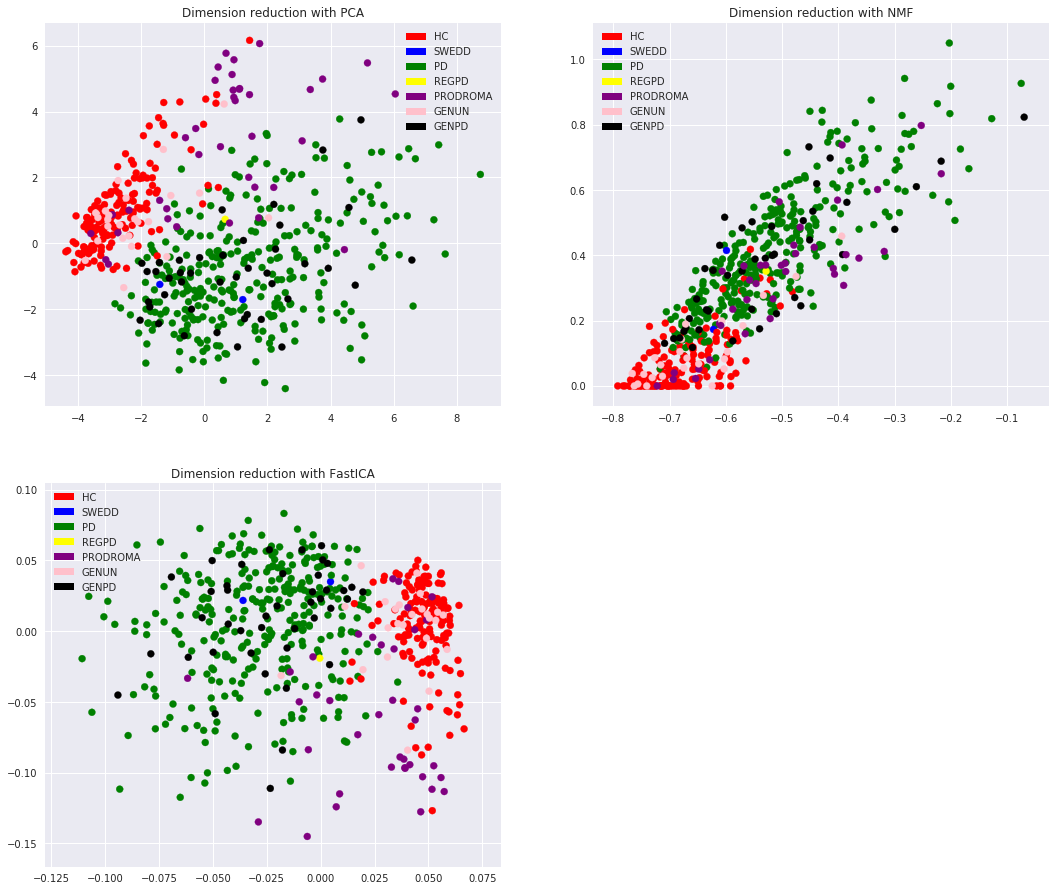

In [33]:
# plot the dimension reduction color makrked with participants' "categories", and "gender"
%matplotlib inline
plt.figure(1, figsize=(18, 24))

## PCA 
plt.subplot(3,2,1)
colors_categories = data_visits["info"].ENROLL_CAT.replace(['HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'], ['red', 'blue', 'green', 'yellow', 'purple', 'pink', 'black'])

plot_1 = plt.scatter(M_W[['PCA_1']], M_W[['PCA_2']], c = colors_categories)

p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc='yellow')
p5 = plt.Rectangle((0, 0), 0.1, 0.1, fc='purple')
p6 = plt.Rectangle((0, 0), 0.1, 0.1, fc='pink')
p7 = plt.Rectangle((0, 0), 0.1, 0.1, fc='black')
plt.legend((p1, p2, p3, p4, p5, p6, p7), ('HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'), loc='best');
plt.title('Dimension reduction with PCA')


## NMF 
plt.subplot(3,2,2)
colors_categories = data_visits["info"].ENROLL_CAT.replace(['HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'], ['red', 'blue', 'green', 'yellow', 'purple', 'pink', 'black'])

plot_1 = plt.scatter(-M_W[['NMF_2_1']], M_W[['NMF_2_2']], c = colors_categories)

p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc='yellow')
p5 = plt.Rectangle((0, 0), 0.1, 0.1, fc='purple')
p6 = plt.Rectangle((0, 0), 0.1, 0.1, fc='pink')
p7 = plt.Rectangle((0, 0), 0.1, 0.1, fc='black')
plt.legend((p1, p2, p3, p4, p5, p6, p7), ('HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'), loc='best');
plt.title('Dimension reduction with NMF')
# plt.plot([0.3,0.6], [0,0.5])
# plt.plot([0.2,0.5], [0.1,0.6])

## ICA
plt.subplot(3,2,3)
colors_categories = data_visits["info"].ENROLL_CAT.replace(['HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'], ['red', 'blue', 'green', 'yellow', 'purple', 'pink', 'black'])

plot_1 = plt.scatter(M_W[['ICA_1']], M_W[['ICA_2']], c = colors_categories)

p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc='yellow')
p5 = plt.Rectangle((0, 0), 0.1, 0.1, fc='purple')
p6 = plt.Rectangle((0, 0), 0.1, 0.1, fc='pink')
p7 = plt.Rectangle((0, 0), 0.1, 0.1, fc='black')
plt.legend((p1, p2, p3, p4, p5, p6, p7), ('HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'), loc='best');
plt.title('Dimension reduction with FastICA')


NMF shows a clear progression of disorder, let's dive into more in depth analysis of progression space. Focusing on HC, and PD:

In [97]:
len(M_W.loc[M_cat.ENROLL_CAT=='PD'])

305

/afs/csail.mit.edu/u/c/cji/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'Movement disorder')

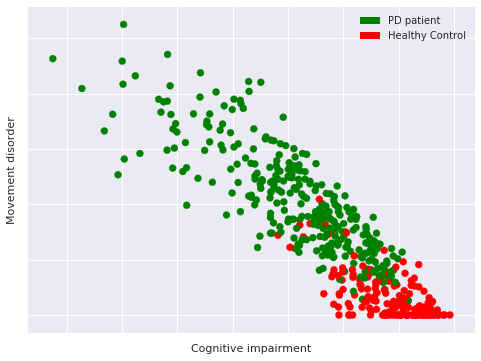

In [34]:
## NMF 
%matplotlib inline
plt.figure(1, figsize=(8, 6))

M_W_select = M_W.loc[ M_cat.ENROLL_CAT.isin(['HC', 'PD']) ]
plt.scatter(M_W_select[['NMF_2_1']], M_W_select[['NMF_2_2']], c = colors_categories[ M_cat.ENROLL_CAT.isin(['HC', 'PD']) ])

p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')

plt.legend((p3, p1), ('PD patient','Healthy Control'), loc='best');
#plt.title('Dimension reduction with NMF')

plt.grid(True)
ax = plt.axes()
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel('Cognitive impairment')
ax.set_ylabel('Movement disorder')
# ax.set_zlabel('Sleep disorder')

## 7. Visualization of progression space in 3D

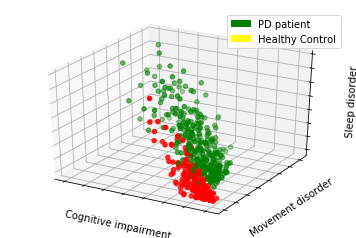

In [86]:
# NMF 3 color makrked with participants' "categories"
%matplotlib inline
#%matplotlib notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')

# plots all
# ax.scatter(M_W[['NMF_3_1']], M_W[['NMF_3_2']], M_W[['NMF_3_3']], c = colors_categories)
# plt.legend((p1, p2, p3, p4, p5, p6, p7), ('HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'), loc='best');

# plots onlt PD and HC
M_W_PD_HC = M_W.loc[ M_cat.ENROLL_CAT.isin(['HC', 'PD']) ]
ax.scatter(M_W_PD_HC[['NMF_3_1']], M_W_PD_HC[['NMF_3_2']], M_W_PD_HC[['NMF_3_3']], c = colors_categories[ M_cat.ENROLL_CAT.isin(['HC', 'PD']) ])


plt.legend((p3, p1), ('PD patient','Healthy Control' ), loc='best');
#plt.show()

ax.grid(True)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.set_xlabel('Cognitive impairment')
ax.set_ylabel('Movement disorder')
ax.set_zlabel('Sleep disorder')
plt.show();

## 8. Dimension mapping

In [73]:
import seaborn as sns
def make_heatmap(orig_data, event_id):
    event_data = orig_data.iloc[:, orig_data.columns.get_level_values(1)=='V10'] 
    event_data.columns = [' '.join(col).strip().replace(event_id,'') for col in event_data.columns.values]
    # M_H_T = M_H.T.sort([1],ascending=False)
    event_data = event_data.T.sort_values(by=[2],ascending=False)
    event_data.fillna(0, inplace=True)
    event_data.replace(to_replace=[float('inf'), float('-inf')], value=0, inplace=True)
    event_data = event_data.loc[(event_data != 0).any(axis=1)] # drop row if all 0
    cg = sns.clustermap(data=event_data, col_cluster=False, figsize=(30, 30), standard_scale=3)
    plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize=20);
    plt.show()

In [74]:
model_NMF3.fit_transform(M_chosen)
# M_W_PD_HC[['NMF_3_1']], M_W_PD_HC[['NMF_3_2']], M_W_PD_HC[['NMF_3_3']]
H = model_NMF3.components_

H_columns = M_chosen.columns
M_H = pd.DataFrame(data=H, columns=H_columns)

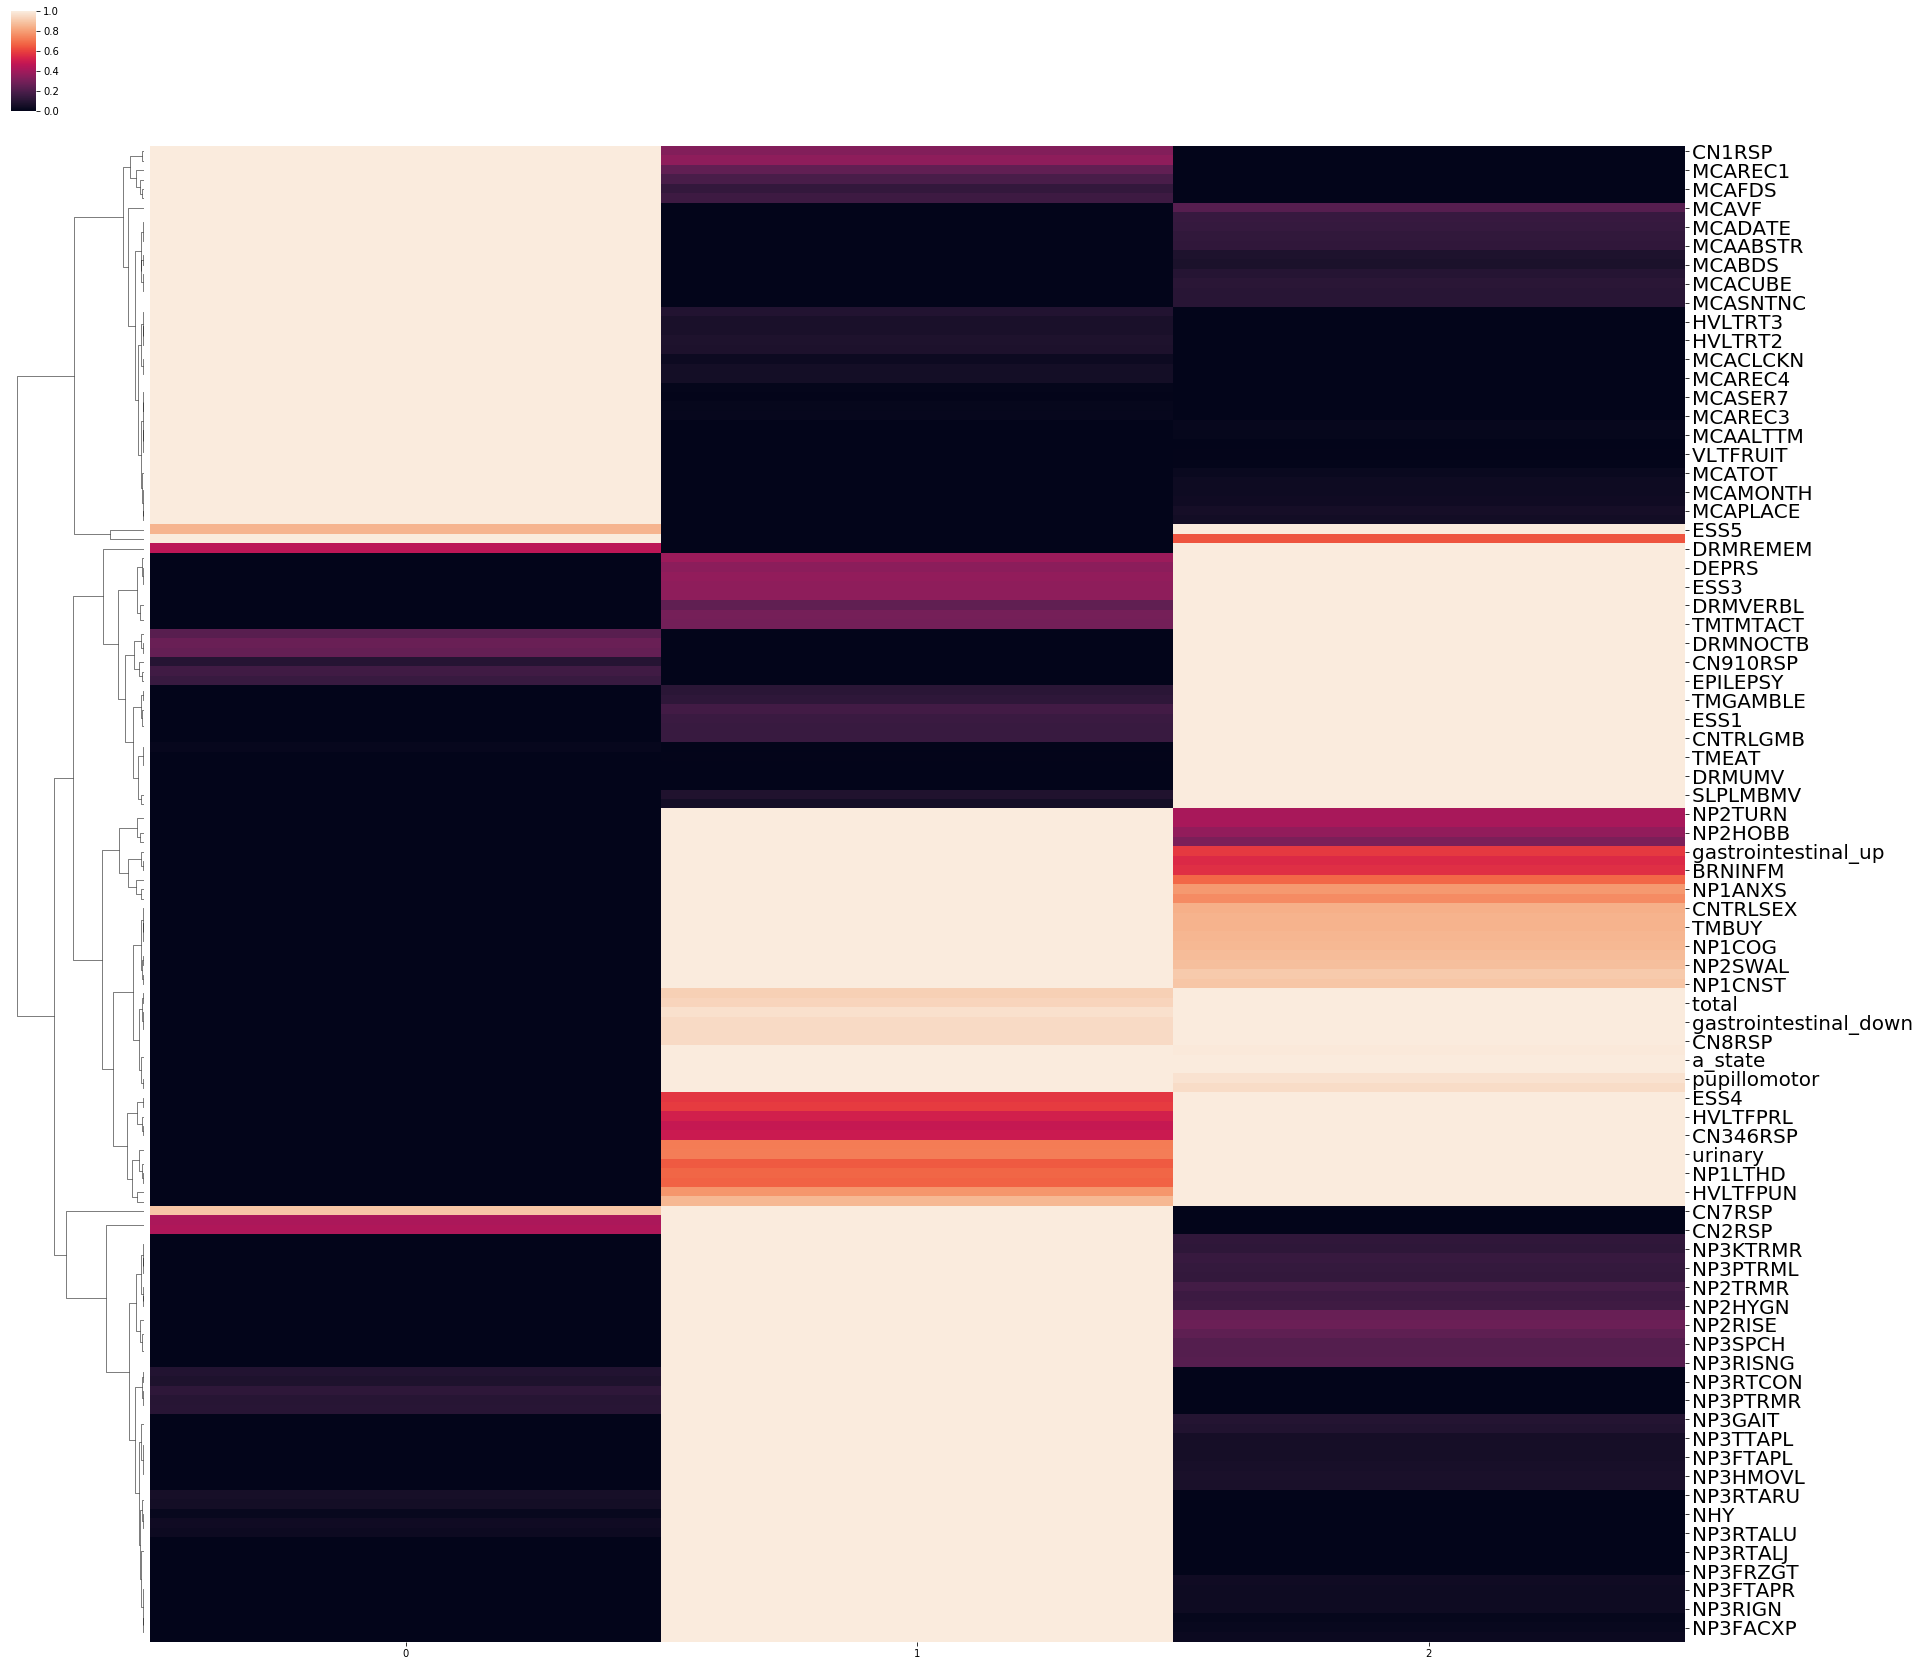

In [75]:
make_heatmap(M_H, 'V10')

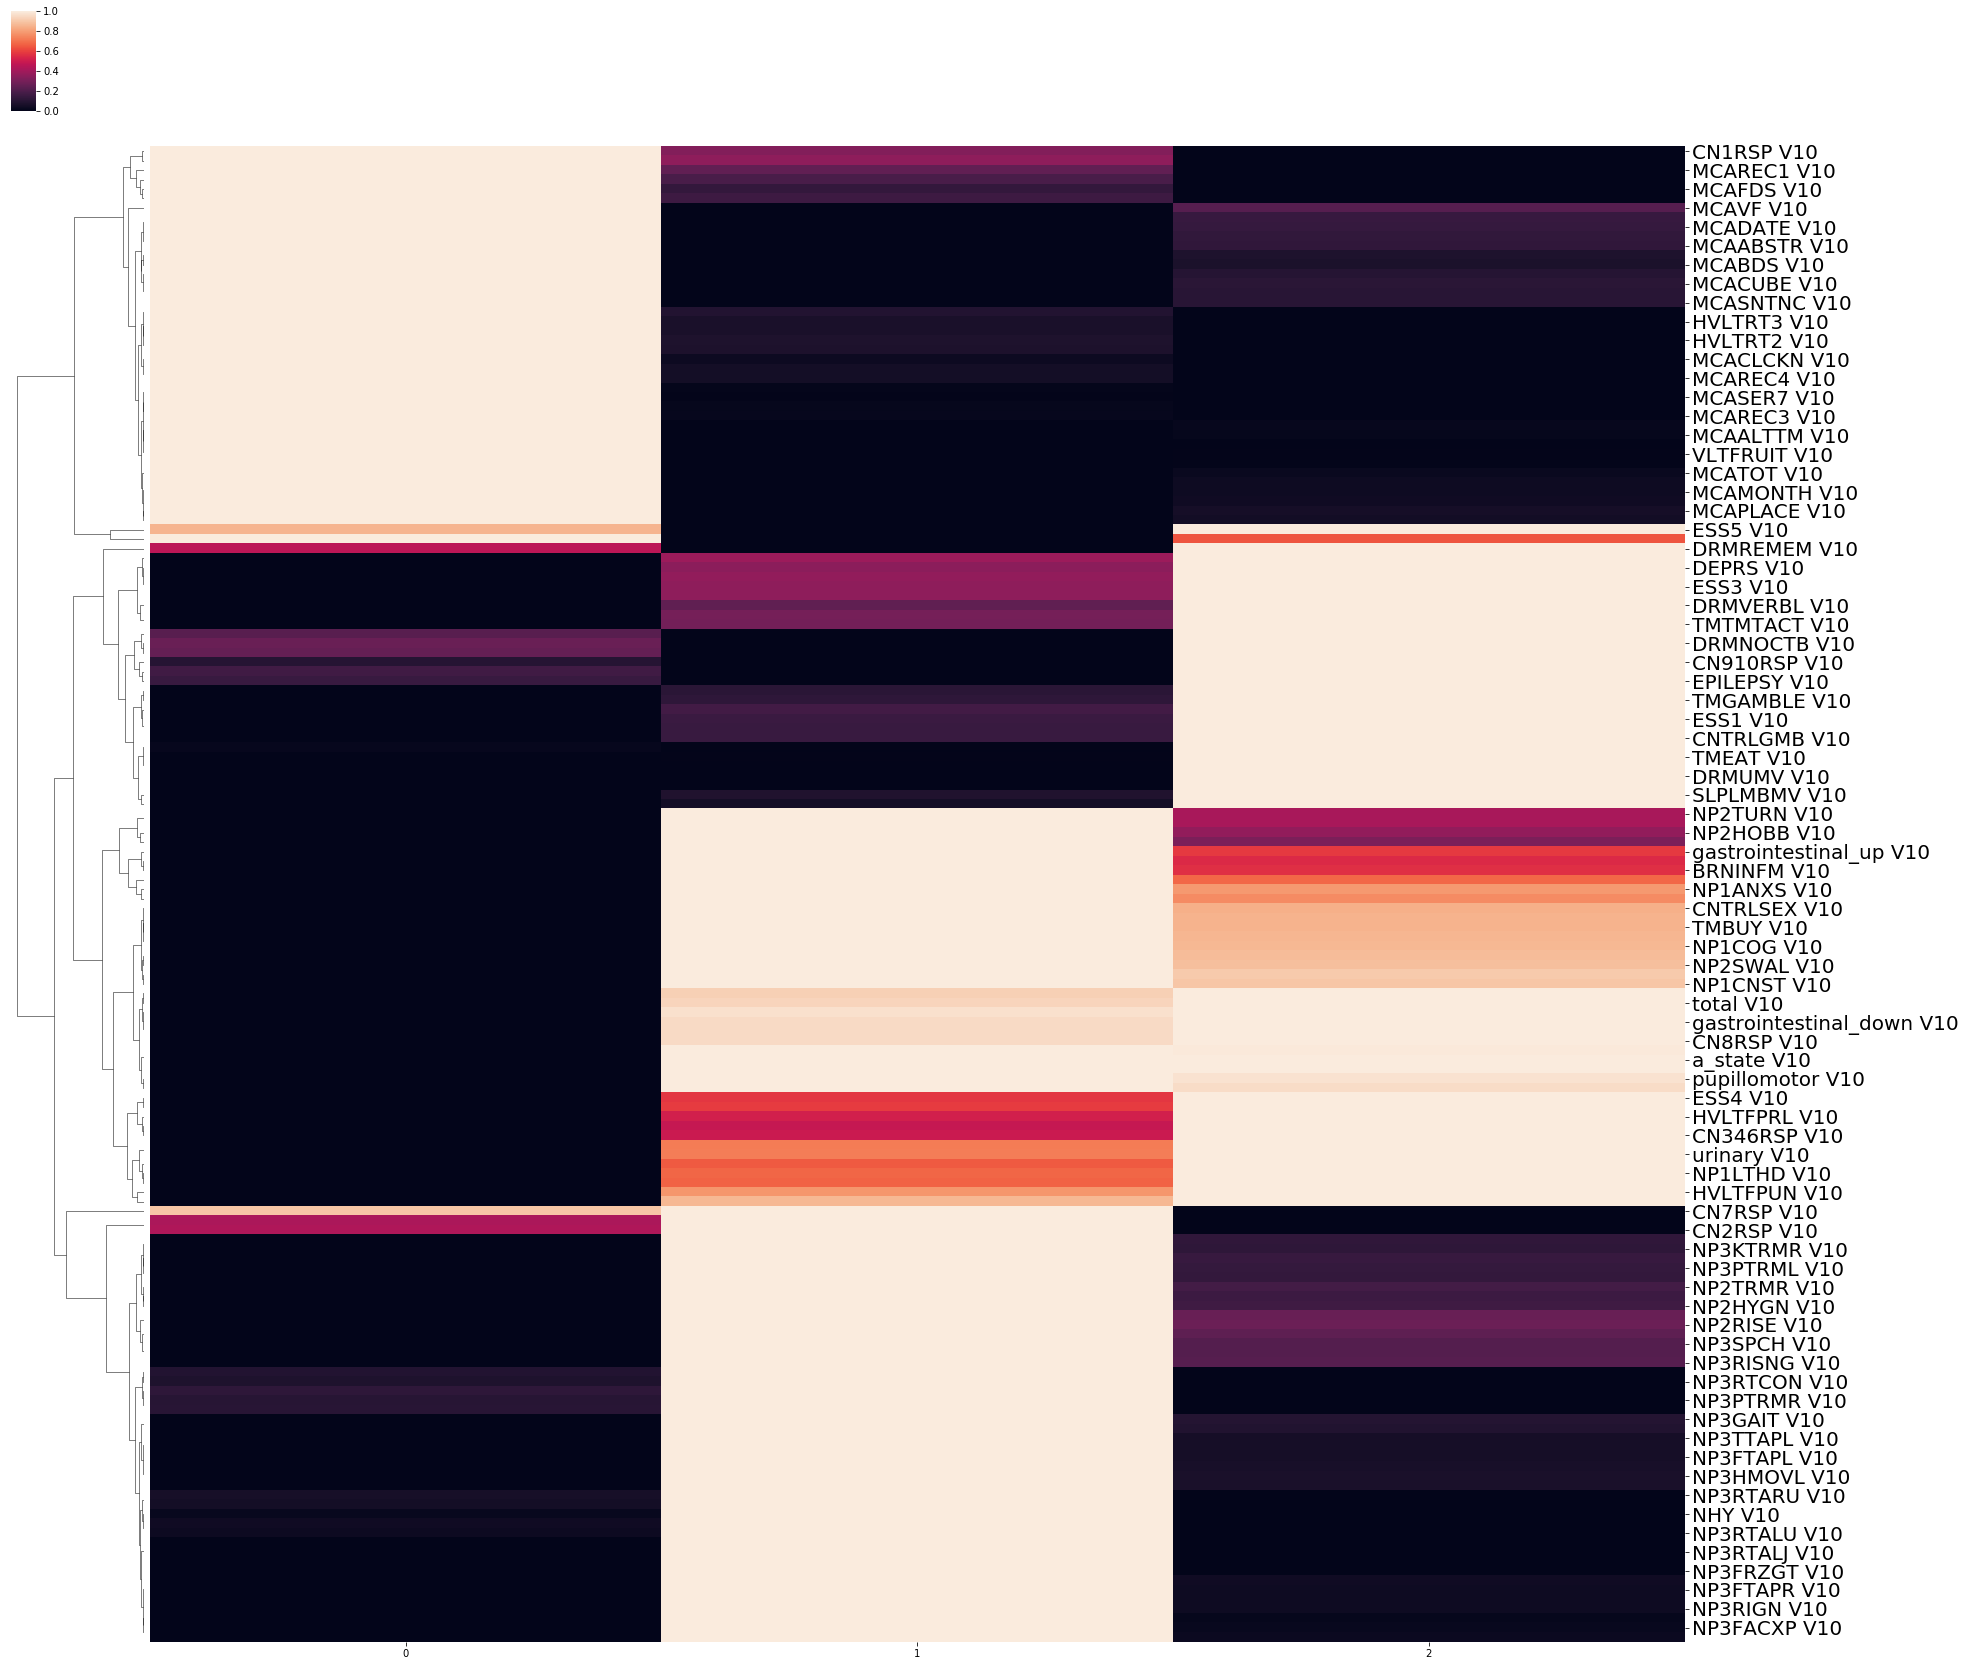

In [77]:
make_heatmap(M_H, 'V04')

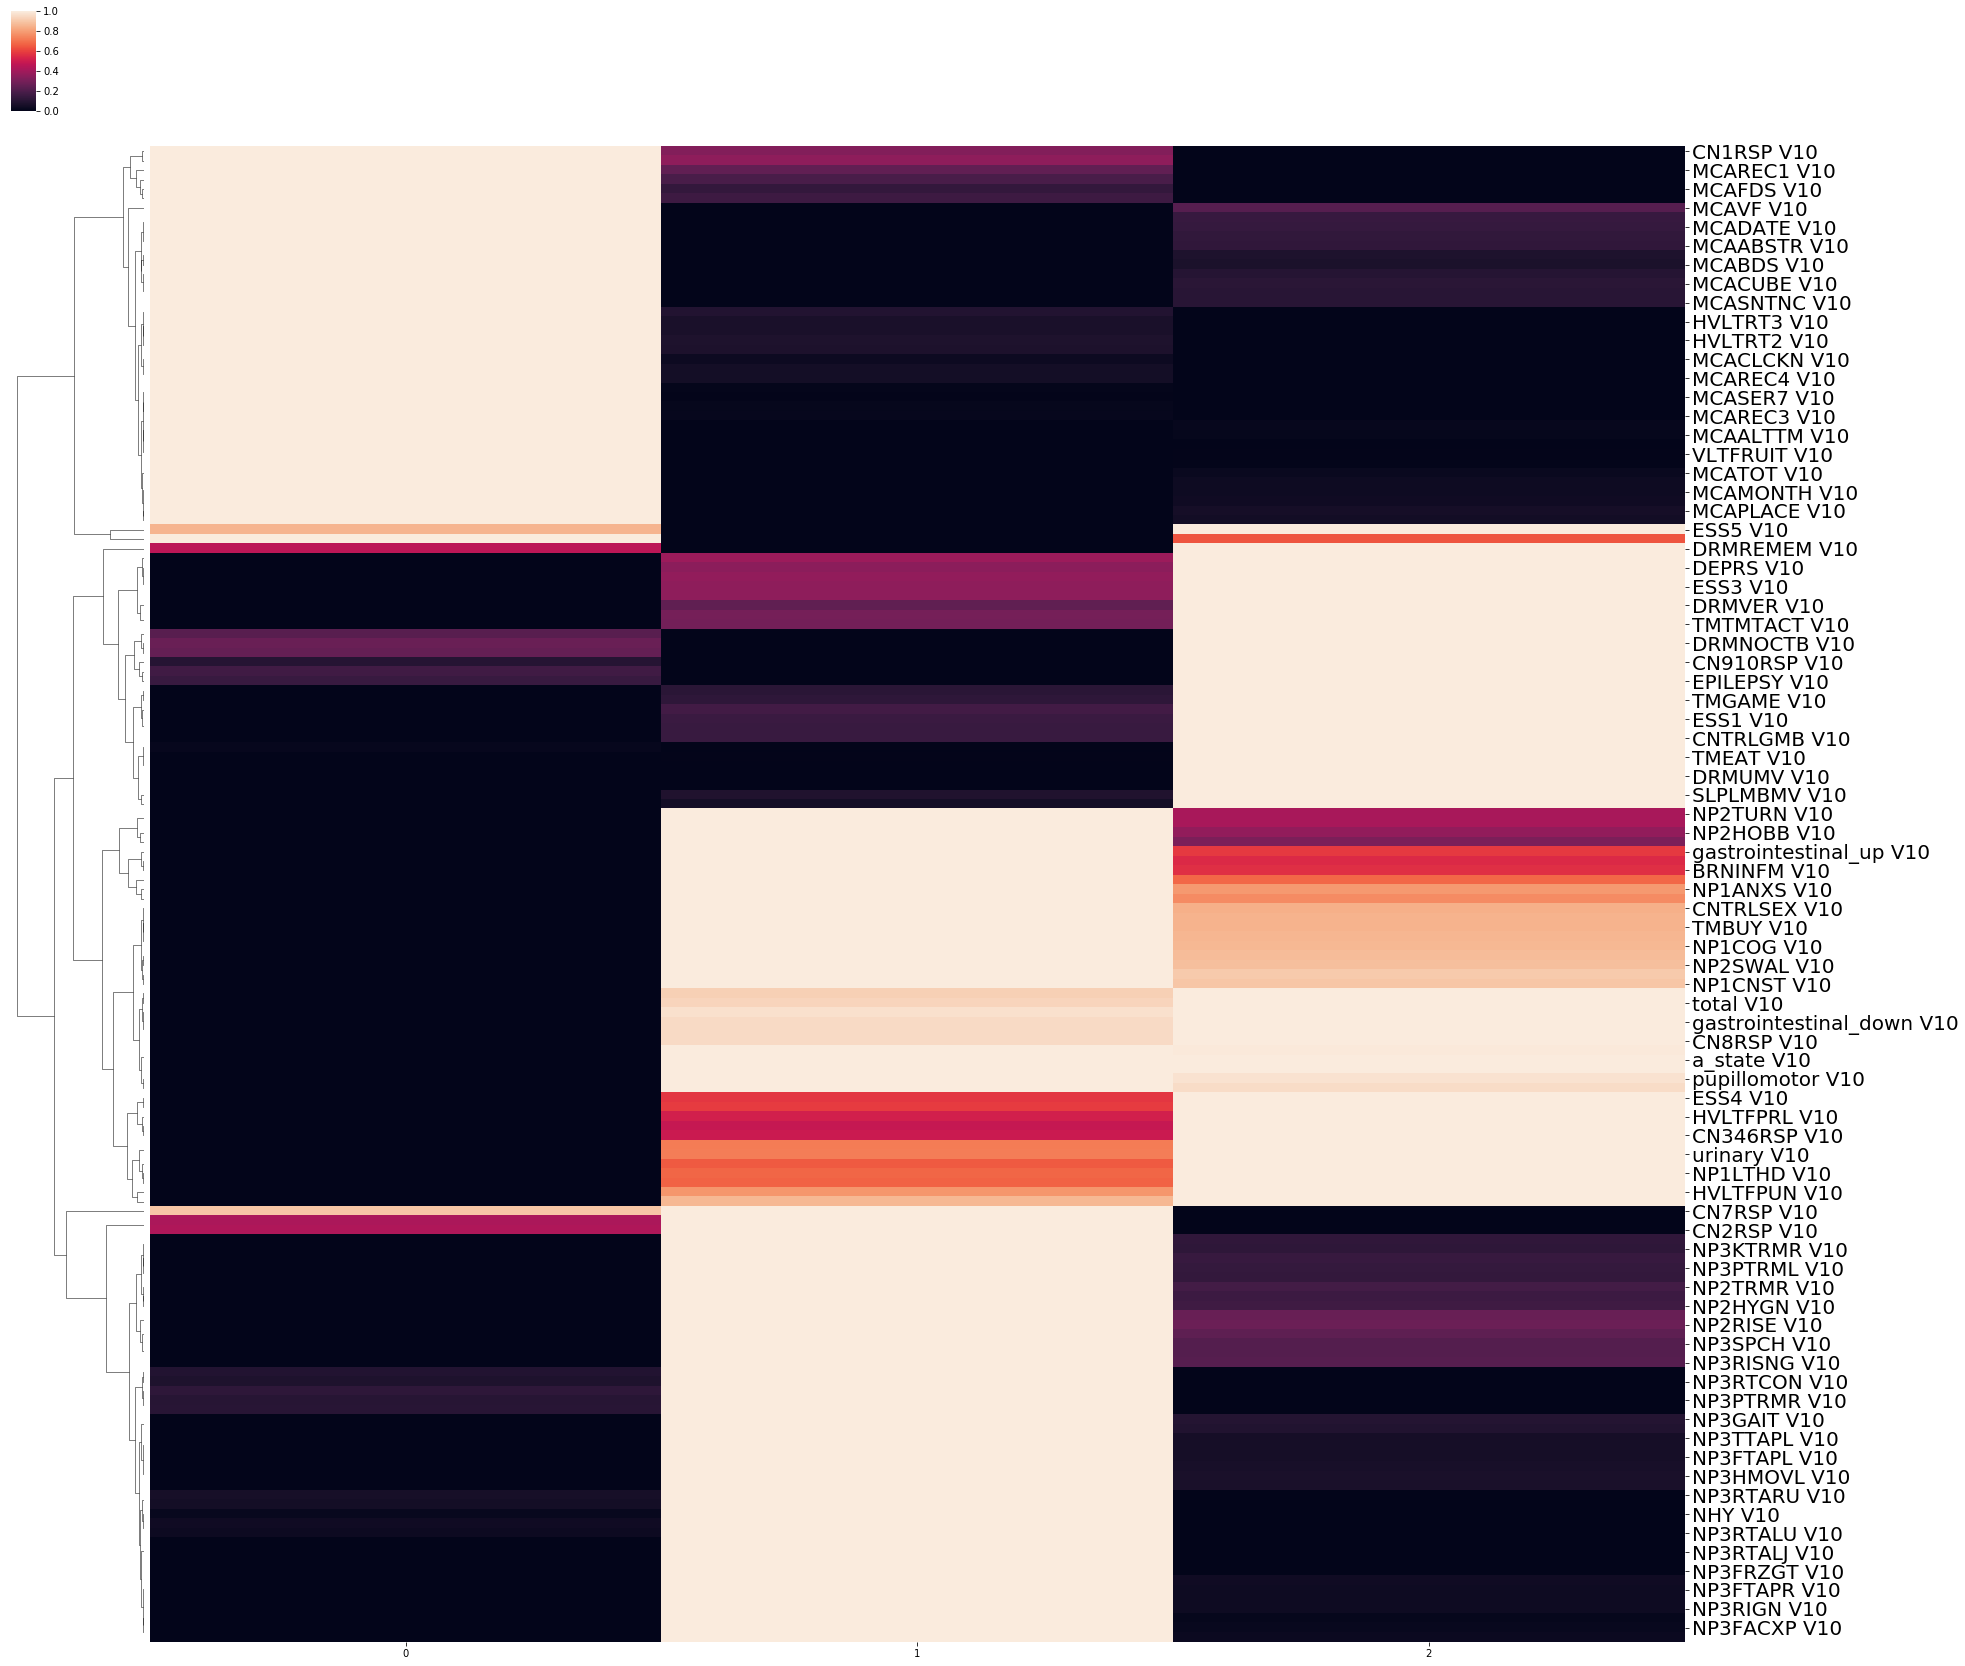

In [76]:
make_heatmap(M_H, 'BL')

In [40]:
import seaborn as sns

# M_W[['NMF_3_1', 'NMF_3_2', 'NMF_3_3']] = model_NMF3.fit_transform(M_chosen)
model_NMF3.fit_transform(M_chosen)
# M_W_PD_HC[['NMF_3_1']], M_W_PD_HC[['NMF_3_2']], M_W_PD_HC[['NMF_3_3']]
H = model_NMF3.components_

H_columns = M_chosen.columns
M_H = pd.DataFrame(data=H, columns=H_columns)
# M_H.loc[]= 
M_H 
# M_H.loc[0] = H[0,:]
# M_H.loc[1] = H[1,:]
# M_H.loc[2] = H[2,:]
M_H = M_H.iloc[:, M_H.columns.get_level_values(1)=='V10'] 
M_H.columns = [' '.join(col).strip().replace('V10','') for col in M_H.columns.values]
# M_H_T = M_H.T.sort([1],ascending=False)
M_H_T = M_H.T.sort_values(by=[2],ascending=False)
M_H_T

,0,1,2
DRMFIGHT,0.000000,0.234497,1.578599
DRMVIVID,0.595853,0.311307,1.547029
DRMVERBL,0.028820,0.402050,1.527238
SLPLMBMV,0.082293,0.201257,1.496886
DRMAGRAC,0.004221,0.164474,1.428910
MVAWAKEN,0.000000,0.075422,1.396532
SLPDSTRB,0.143108,0.475465,1.056281
DRMUMV,0.000000,0.000000,1.047427
SLPINJUR,0.000000,0.000000,0.955234
DRMREMEM,0.412207,0.000000,0.887446


In [51]:
M_H_T.fillna(0, inplace=True)
M_H_T.replace(to_replace=[float('inf'), float('-inf')], value=0, inplace=True)
M_H_T = M_H_T.loc[(M_H_T != 0).any(axis=1)] # drop row if all 0

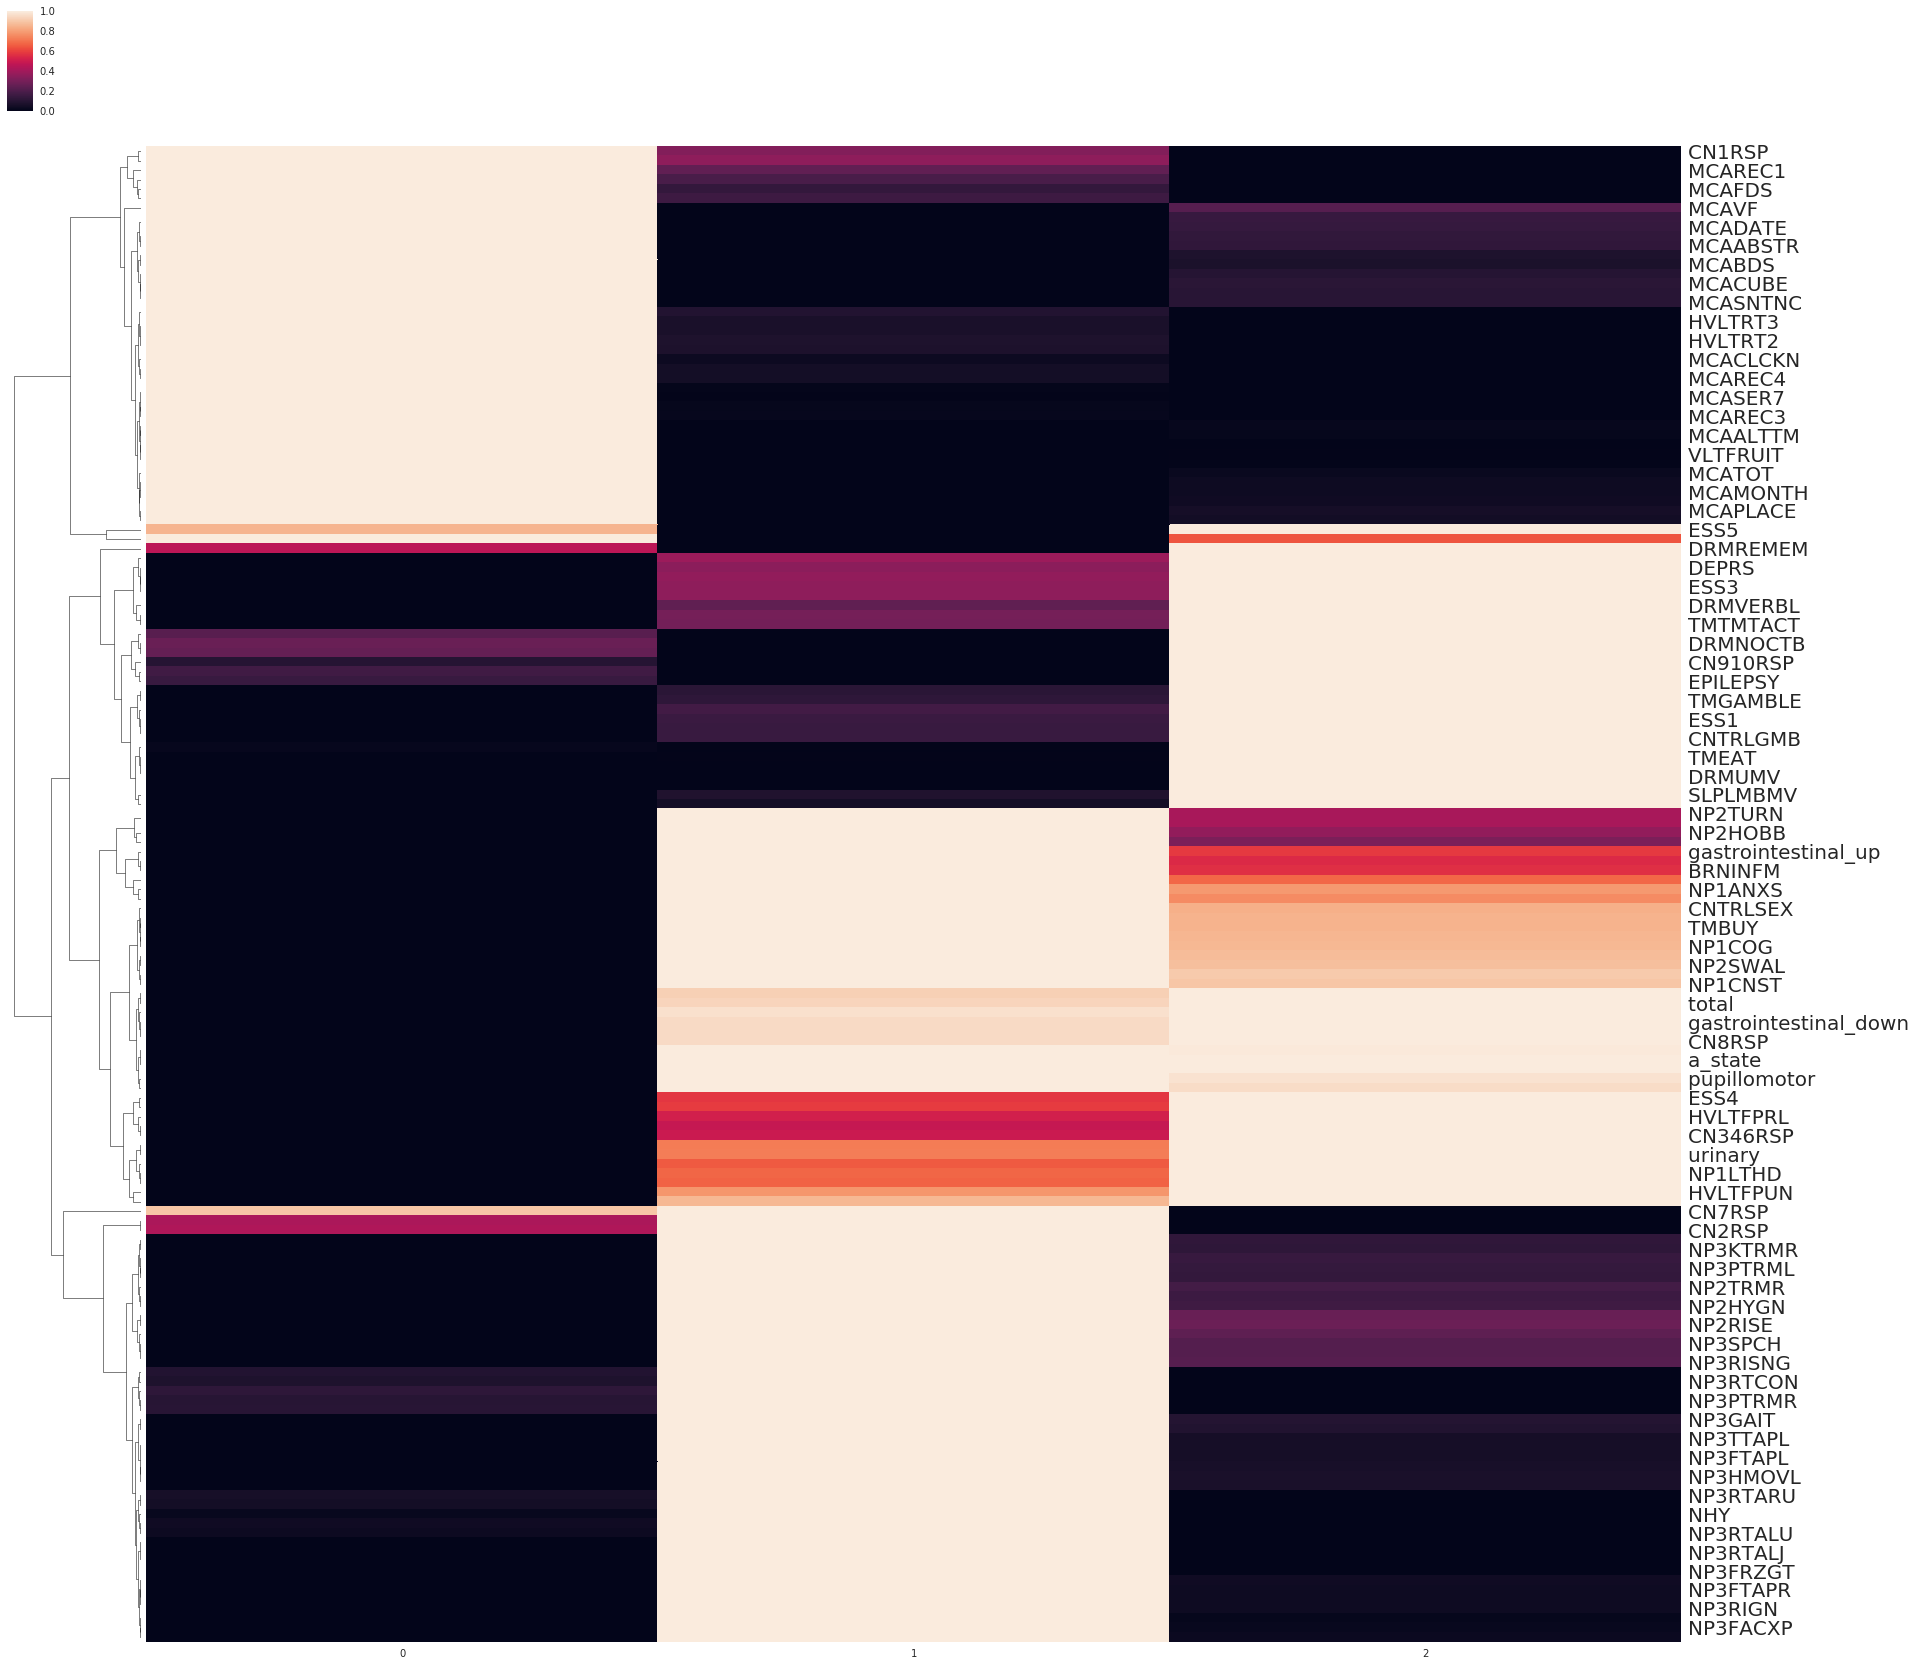

In [52]:
#sns.heatmap(M_H_T)

%matplotlib inline
a4_dims = (5, 30)
# fig, ax = plt.subplots(figsize=a4_dims)
# sns.heatmap(ax=ax, data=M_H_T )
# sns.clustermap(data=M_H_T, col_cluster=False, standard_scale=1)
cg = sns.clustermap(data=M_H_T, col_cluster=False, figsize=(30, 30), standard_scale=3)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize=20);

# total is GDS total, a_state is anxiety
# 1: cognitive
# 2: motor (at bottom) + 3 autonomic, 1 sleep, 4 psychiatric
# 3: sleep + autonomic mostly

In [53]:
model_NMF3.components_[0,:].sum() / (model_NMF3.components_.sum())

0.3148380976691604

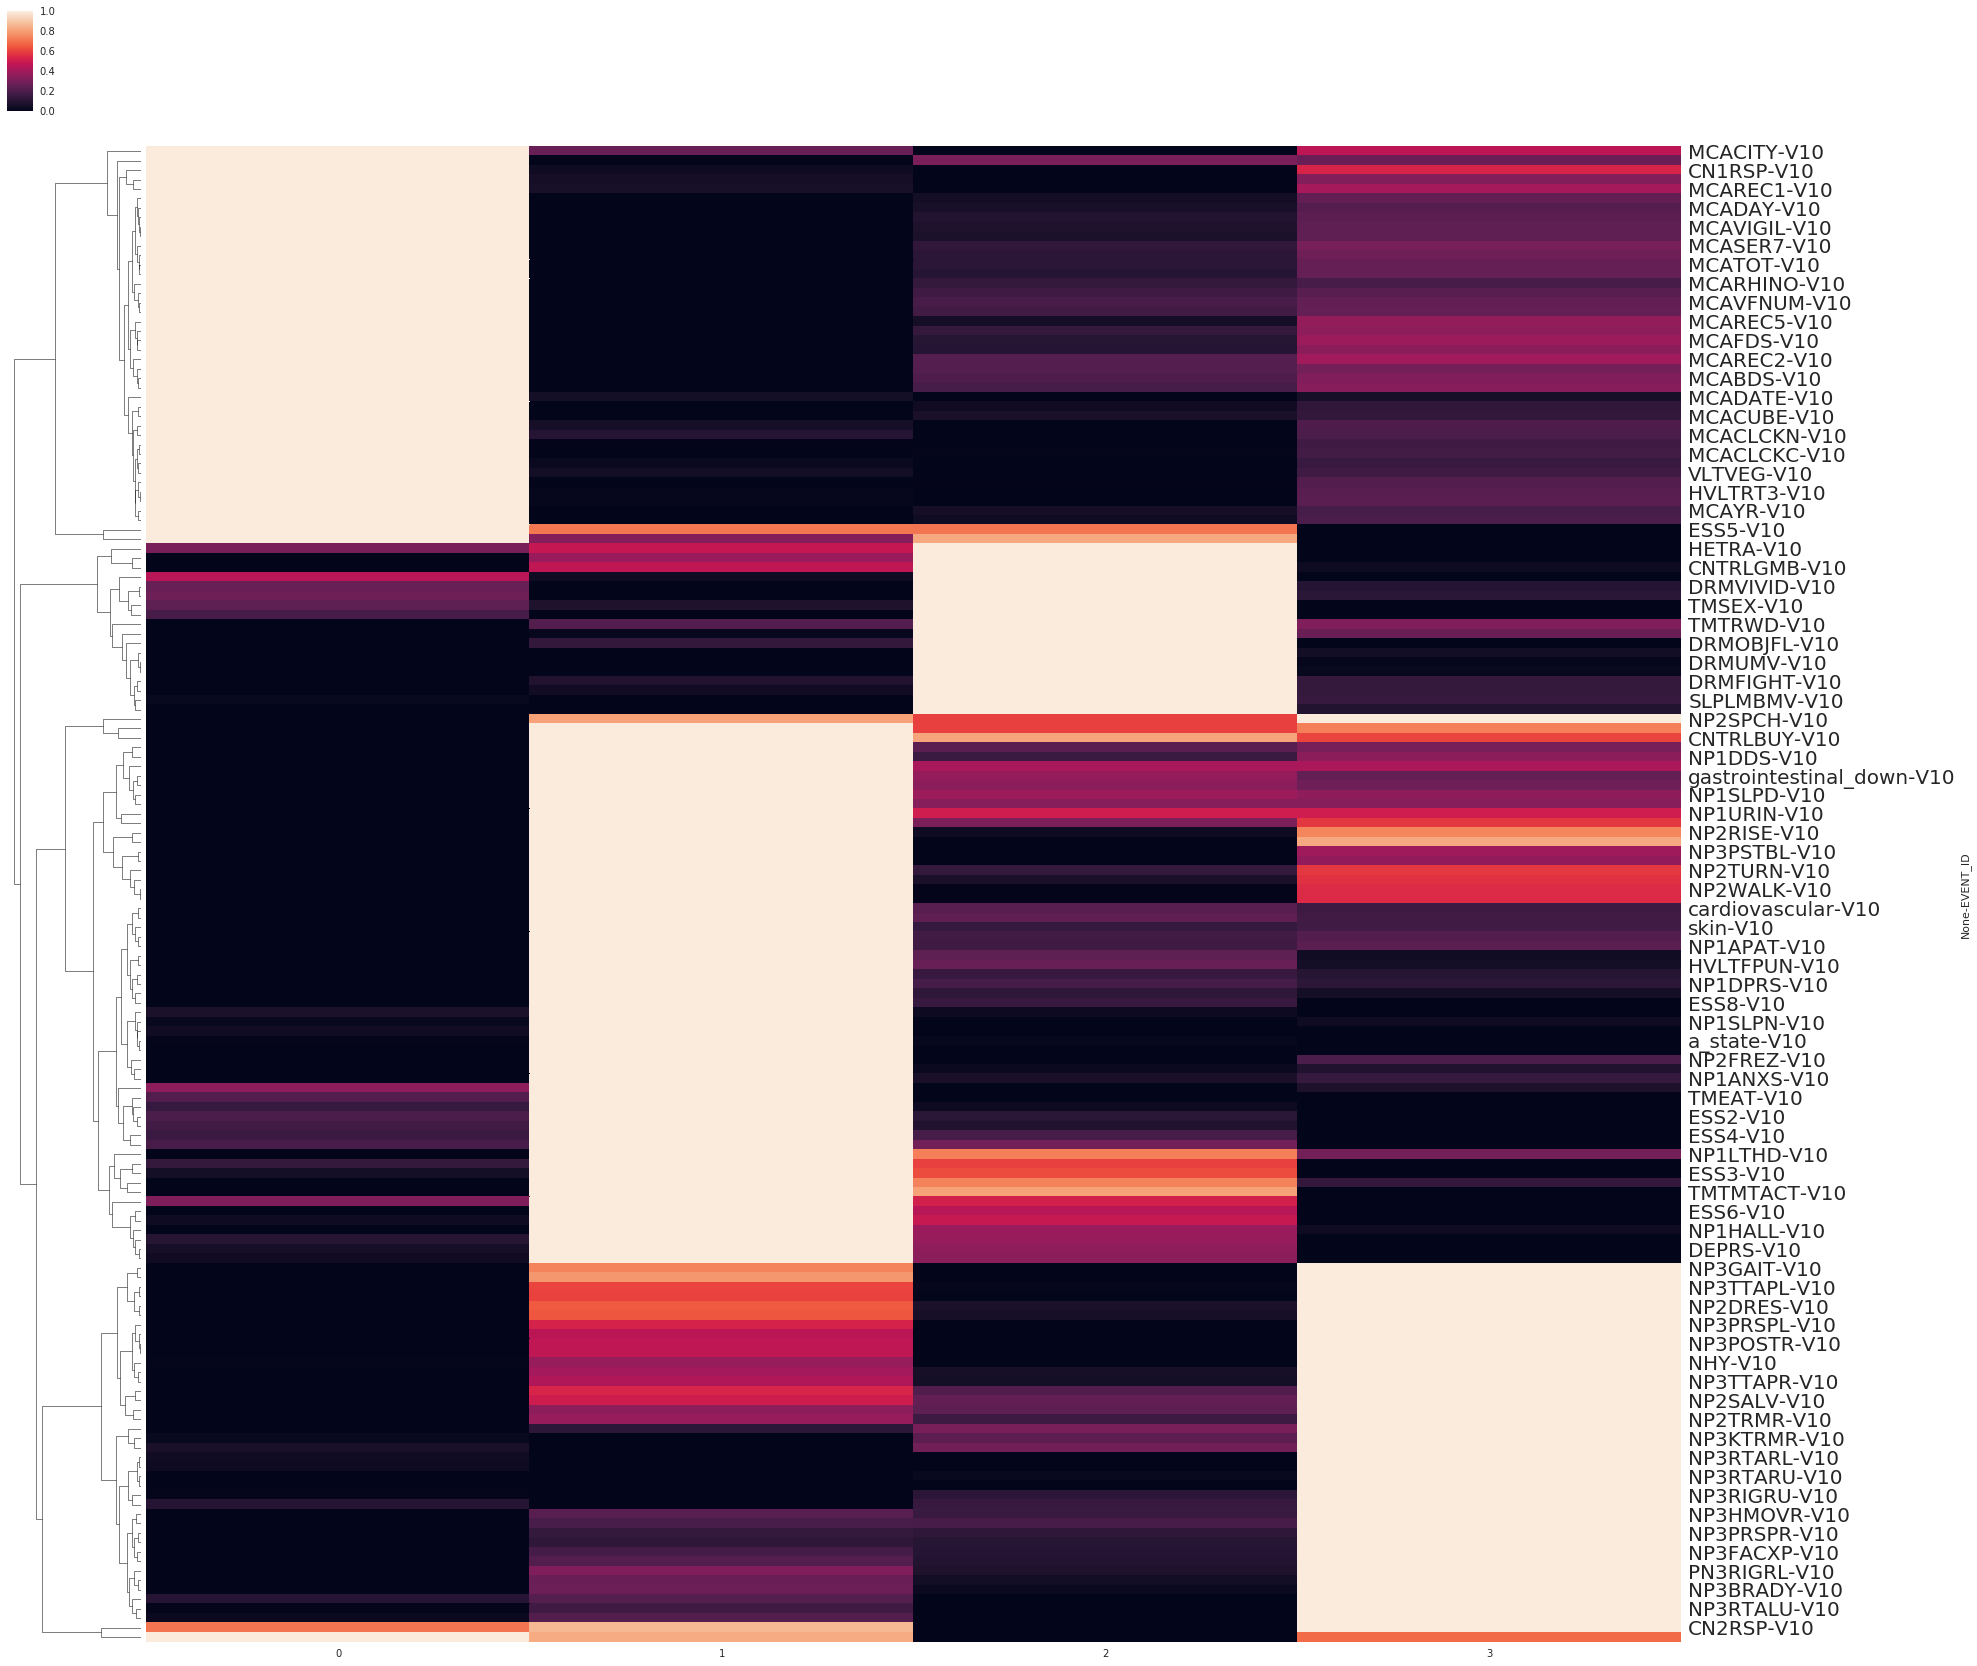

In [56]:
model_NMF4 = decomposition.NMF(n_components=4, init='nndsvda', max_iter=200)
model_NMF4.fit_transform(M_chosen)
H = model_NMF4.components_
H_columns = M_chosen.columns
M_H = pd.DataFrame(columns=H_columns)
M_H.loc[0] = H[0,:]
M_H.loc[1] = H[1,:]
M_H.loc[2] = H[2,:]
M_H.loc[3] = H[3,:]
M_H = M_H.iloc[:, M_H.columns.get_level_values(1)=='V10'] 
# M_H.columns = [' '.join(col).strip() for col in M_H.columns.values]
M_H_T = M_H.T.sort_values(by=[2],ascending=False)
M_H_T.fillna(0, inplace=True)
M_H_T.replace(to_replace=[float('inf'), float('-inf')], value=0, inplace=True)
M_H_T = M_H_T.loc[(M_H_T != 0).any(axis=1)] # drop row if all 0
M_H_T
cg = sns.clustermap(data=M_H_T.fillna(0), col_cluster=False, figsize=(30, 30), standard_scale=3)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize=20);
# 1: cognitive
# 2: mix of motor, sleep, autonomic, psychiatric
# 3: mostly sleep w/ 3 QUIP
# 4: motor

In [57]:
model_NMF4.components_[2,:].sum()

253.74651987028534

## 8. Unsuperviside learning for categorization 
### 8.1 using GMM unsupervised

/afs/csail.mit.edu/u/c/cji/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/afs/csail.mit.edu/u/c/cji/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'Movement disorder')

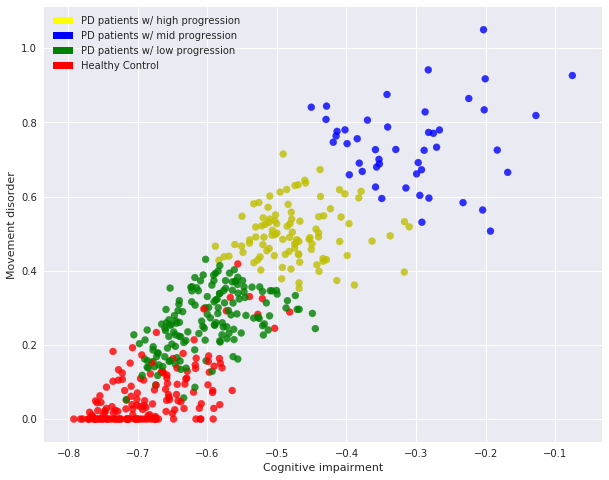

In [58]:
# label HC as HC
M_label_columns = ['GMM']
M_label = pd.DataFrame(index=M_chosen.index, columns=M_label_columns)

M_label[ M_cat.ENROLL_CAT == "HC" ] = 'HC'
M_label[ M_cat.ENROLL_CAT == "SWEDD" ] = 'SWEDD'

# label PD using GMM
M_gmm_chosen = M_W[['NMF_2_1', 'NMF_2_2']] #M_W[['PCA_1', 'PCA_2']]
M_PD_gmm_chosen = M_gmm_chosen[ M_cat.ENROLL_CAT == "PD" ]
M_PD_HC_gmm_chosen = M_gmm_chosen[ M_cat.ENROLL_CAT.isin(['HC', 'PD']) ]
M_PD_HC_SWEDD_gmm_chosen = M_gmm_chosen[ M_cat.ENROLL_CAT.isin(['HC', 'PD', 'SWEDD']) ]

from sklearn import mixture
model_gmm = mixture.GaussianMixture(n_components=3, covariance_type='tied')
model_gmm.fit(M_PD_gmm_chosen) # print(gmm.means_)

# label the predicted and only keep HC and PDs
M_label.loc[ M_cat.ENROLL_CAT == "PD", 'GMM' ] = model_gmm.predict(M_PD_gmm_chosen)
M_label.replace([1,0,2],['PD_l', 'PD_m', 'PD_h'], inplace=True)
M_label_PD = M_label[ M_cat.ENROLL_CAT.isin(['PD']) ]
M_label_PD_HC = M_label[ M_cat.ENROLL_CAT.isin(['HC', 'PD']) ]
M_label_PD_HC_SWEDD = M_label[ M_cat.ENROLL_CAT.isin(['HC', 'PD', 'SWEDD']) ]

# plot only predicted PD
%matplotlib inline
# plt.figure(1, figsize=(20, 16))
# plt.subplot(2,2,1)
# colors = ['b' if i==0 else 'g' if i==1 else 'y' if i==2 else 'r' for i in model_gmm.predict(M_PD_gmm_chosen)]
# ax = plt.scatter(-M_PD_gmm_chosen[[0]], M_PD_gmm_chosen[[1]], c=colors, alpha=0.8)#gca()
# # ax.scatter(M_PD_gmm_chosen[[0]], M_PD_gmm_chosen[[1]], c=colors, alpha=0.8)
# p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='yellow')
# p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
# p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
# plt.legend((p1, p2, p3), ('PD High', 'PD Mid', 'PD Low'), loc='best');
# plt.title('Labeling PD based on GMM')

# plot predicted PD and HC
# plt.subplot(2,2,2)
plt.figure(1, figsize=(10, 8))
colors = ['r' if i=='HC' else 'g' if i=='PD_l' else 'b' if i=='PD_m' else 'y' if i=='PD_h' else 'black' for i in M_label_PD_HC['GMM']]
ax = plt.scatter(-M_PD_HC_gmm_chosen.iloc[:,0], M_PD_HC_gmm_chosen.iloc[:,1], c=colors, alpha=0.8)#gca()
# ax.scatter(M_PD_HC_gmm_chosen[[0]], M_PD_HC_gmm_chosen[[1]], c=colors, alpha=0.8)
p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='yellow')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
plt.legend((p1, p2, p3, p4), ('PD patients w/ high progression', 'PD patients w/ mid progression', 'PD patients w/ low progression', 'Healthy Control'), loc='best');
# plt.title('Adding HC to the labeld PD')
# plt.axes().set_xticklabels([])
# plt.axes().set_yticklabels([])
plt.axes().set_xlabel('Cognitive impairment')
plt.axes().set_ylabel('Movement disorder')
# ax.set_zlabel('Sleep disorder')

### 8.2 Store for PDBP replication

In [ ]:
%store model_gmm
%store M_PD_HC_gmm_chosen

### 8.3 Distribution visualization

,NMF_2_1,NMF_2_2
PATNO,,
3000,0.735339,0.0171453
3004,0.676246,0.0786382
3008,0.539517,0.330265
3009,0.572899,0.291555
3013,0.617552,0.14598
3053,0.675263,0
3055,0.657486,0.0960062
3057,0.693301,0.0258296
3064,0.715623,0


/afs/csail.mit.edu/u/c/cji/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/afs/csail.mit.edu/u/c/cji/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


ValueError: color kwarg must have one color per dataset

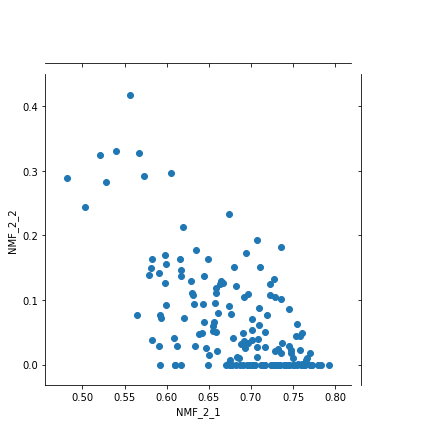

In [59]:
import matplotlib as mpl
mpl.style.use('default')
%matplotlib inline

hc_df = M_PD_HC_gmm_chosen.loc[M_label.GMM.isin(['HC'])][['NMF_2_1','NMF_2_2']]
#x_hc = M_PD_HC_gmm_chosen.loc[M_label.GMM.isin(['HC']),'NMF_2_1']
#y_hc = M_PD_HC_gmm_chosen.loc[M_label.GMM.isin(['HC']),'NMF_2_2']

x_pd_l = M_PD_HC_gmm_chosen.loc[M_label.GMM.isin(['PD_l']),'NMF_2_1']
y_pd_l = M_PD_HC_gmm_chosen.loc[M_label.GMM.isin(['PD_l']),'NMF_2_2']

x_pd_m = M_PD_HC_gmm_chosen.loc[M_label.GMM.isin(['PD_m']),'NMF_2_1']
y_pd_m = M_PD_HC_gmm_chosen.loc[M_label.GMM.isin(['PD_m']),'NMF_2_2']

x_pd_h = M_PD_HC_gmm_chosen.loc[M_label.GMM.isin(['PD_h']),'NMF_2_1']
y_pd_h = M_PD_HC_gmm_chosen.loc[M_label.GMM.isin(['PD_h']),'NMF_2_2']

plt.ion()
plt.show()
plt.pause(0.001)
a = 0.1
l = 10
zo = 0

#p = sns.JointGrid(x = x_hc, y = y_hc)
#p = p.plot_joint(plt.scatter, c="R", alpha = a)
# p.ax_marg_x.hist(-x_hc, alpha = 0.5, color='r')
# p.ax_marg_y.hist(y_hc, orientation = 'horizontal', alpha = 0.5, color='r')
#hc_df = pd.DataFrame(x_hc, columns=['Motor dimension'])
#hc_df['Cognitive dimension'] = y_hc
display(hc_df)
sns.jointplot(x="NMF_2_1", y="NMF_2_2", data=hc_df)#, cmap='Reds');
#p.plot_marginals(sns.distplot)#, color='r', axlabel=[])
#p.plot_joint(sns.kdeplot, zorder=zo, n_levels=l, cmap="Reds")

p.x = x_pd_l
p.y = y_pd_l
p.plot_joint(plt.scatter, c="g", alpha = a)
p.plot_marginals(sns.distplot, color='g', axlabel=[])
p.plot_joint(sns.kdeplot, zorder=zo, n_levels=l, cmap="Greens")

p.x = x_pd_m
p.y = y_pd_m
p.plot_joint(plt.scatter, c="b", alpha = a)
p.plot_marginals(sns.distplot, color='b', axlabel=[])
p.plot_joint(sns.kdeplot, zorder=zo, n_levels=l, cmap="Blues")

p.x = x_pd_h
p.y = y_pd_h
p.plot_joint(plt.scatter, c="y", alpha = a)
p.plot_marginals(sns.distplot, color='y', axlabel=[])
p.plot_joint(sns.kdeplot, zorder=zo, n_levels=l, cmap="Oranges")

p.set_axis_labels(xlabel='Motor dimension', ylabel='Cognitive dimension')
p.ax_joint.set_xticklabels([])
p.ax_joint.set_yticklabels([])
# p.ax_marg_x.legend_.remove()

p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='yellow')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
plt.legend((p1, p2, p3, p4), ('PDvec3', 'PDvec2', 'PDvec1', 'Non-PD'), loc='best',prop={'size':12});

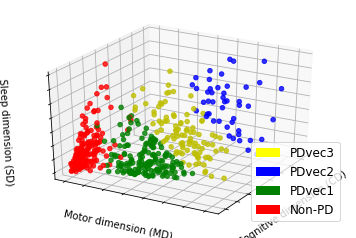

In [88]:
# NMF 3 color makrked with participants' "categories"
%matplotlib inline
#%matplotlib notebook
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

mpl.style.use('seaborn-colorblind')
ax = plt.axes(projection='3d')

# plots all
# ax.scatter(M_W[['NMF_3_1']], M_W[['NMF_3_2']], M_W[['NMF_3_3']], c = colors_categories)
# plt.legend((p1, p2, p3, p4, p5, p6, p7), ('HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'), loc='best');

# plots onlt PD and HC
# colors = ['r' if i=='HC' else 'g' if i=='PD_l' else 'b' if i=='PD_m' else 'y' if i=='PD_h' else 'black' for i in M_label_PD_HC['GMM']]
# ax = plt.scatter(-M_PD_HC_gmm_chosen[[0]], M_PD_HC_gmm_chosen[[1]], c=colors, alpha=0.8)#gca()


M_W_PD_HC = M_W.loc[ M_cat.ENROLL_CAT.isin(['HC', 'PD']) ]
ax.scatter(M_W_PD_HC[['NMF_3_1']], M_W_PD_HC[['NMF_3_2']], M_W_PD_HC[['NMF_3_3']], c = colors, alpha=0.8);
p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='yellow')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
plt.legend((p1, p2, p3, p4), ('PDvec3', 'PDvec2', 'PDvec1', 'Non-PD'), loc='best',prop={'size':12});

ax.grid(True)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.set_xlabel('Cognitive dimension (CD)')
ax.set_ylabel('Motor dimension (MD)')
ax.set_zlabel('Sleep dimension (SD)')


# defult: elev = 30, -60 degree
ax.view_init(elev=30., azim=30);
#plt.legend();
plt.show();
# ax.view_init(elev=90, azim=0)

### 8.4 distribution of classes

In [61]:
# M_W_PD_HC[['NMF_3_1','NMF_3_2','NMF_3_3']].to_csv("M_nmf_PD_HC.csv")
M_label_PD_HC.to_csv("M_label_PD_HC.csv")

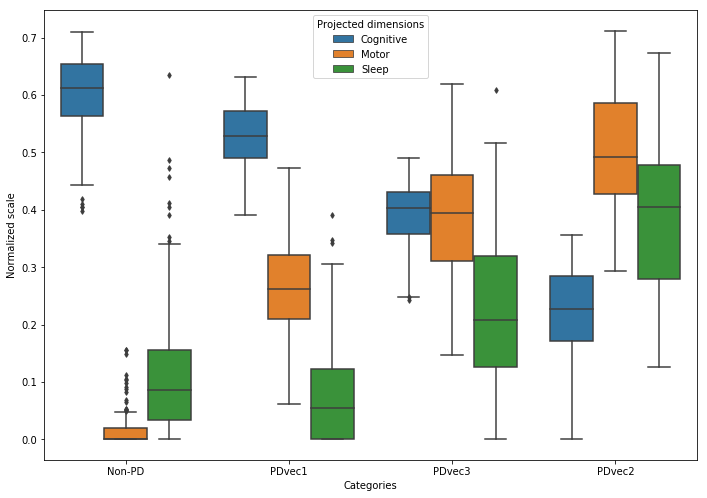

In [62]:
mpl.style.use('default')
M_boxbar = M_W[['NMF_3_1','NMF_3_2','NMF_3_3']]
M_boxbar.columns = ['Cognitive', 'Motor', 'Sleep']
M_boxbar = pd.concat([M_label_PD_HC.replace(['HC','PD_l', 'PD_m', 'PD_h'] , 
                                            ['Non-PD','PDvec1', 'PDvec2', 'PDvec3'])
                      , M_boxbar], axis=1, join='inner')
# M_boxbar['Cognitive impairment'] = -M_boxbar['Cognitive impairment']

a = M_boxbar.reset_index().set_index(['PATNO','GMM']).stack().reset_index().set_index('PATNO')
a.columns = ['Categories', 'Projected dimensions', 'Normalized scale']
a['Normalized scale'] = a['Normalized scale'].apply(pd.to_numeric)

# plot
%matplotlib inline
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
cg = sns.boxplot(x="Categories", y="Normalized scale", hue="Projected dimensions", data=a, fliersize=4, ax=ax);

# alternative plot
# g = sns.FacetGrid(col="GMM", data=a);
# g = g.map(sns.boxplot, "hue", "value")


### 8.5 Timeline of classes

0         1         2
         EVENT_ID                              
MCADATE  V06       1.511806  0.548699  0.608727
         V10       1.509462  0.499790  0.645613
MCACLCKN V10       1.503999  0.436936  0.398329
MCACLCKC V10       1.496383  0.598709  0.613987
MCADATE  V05       1.496177  0.564303  0.638788
MCAMONTH BL        1.491701  0.581579  0.686705
MCADAY   V10       1.489862  0.639739  0.670873
MCADATE  V08       1.486426  0.608262  0.558555
MCADAY   V08       1.484081  0.664938  0.689048
         V06       1.482713  0.661677  0.707843
MCAFDS   V10       1.482470  0.645951  0.515092

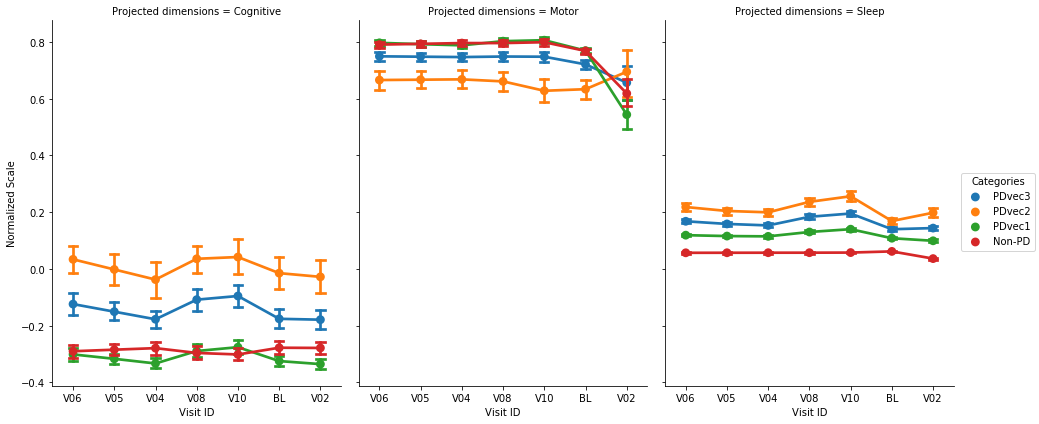

In [89]:
from sklearn.cluster import KMeans
mpl.style.use('default')

# Clustering columns
M_H.T.sort_values(by=[0],ascending=False).head(11)
M_H_T = M_H.T.sort_values(by=[1],ascending=False)

kmeans = KMeans(n_clusters=3, random_state=0).fit(M_H_T)

# Columns 
cog_cols = M_H_T[kmeans.labels_ == 2].index.values.tolist()
mov_cols = M_H_T[kmeans.labels_ == 1].index.values.tolist()
sleep_cols = M_H_T[kmeans.labels_ == 0].index.values.tolist()

cog_cols = np.char.strip(cog_cols)[:,0]#[3:5]
cog_cols = np.delete(cog_cols, [1,5,8]) #  remove ones with reverse direction 1,5,6,7 // ESS5 // attention, visuospatial
mov_cols = np.char.strip(mov_cols)[:,0]
sleep_cols = np.char.strip(sleep_cols)[:,0]

M_cog = M_chosen.loc[:, M_chosen.columns.get_level_values(0).isin(cog_cols)].stack()#.reset_index().set_index('PATNO')
M_mov = M_chosen.loc[:, M_chosen.columns.get_level_values(0).isin(mov_cols)].stack()#.reset_index().set_index('PATNO')
M_sleep = M_chosen.loc[:, M_chosen.columns.get_level_values(0).isin(sleep_cols)].stack()#.reset_index().set_index('PATNO')

a = pd.concat([M_cog.mean(axis=1)-0.5, M_mov.mean(axis=1), M_sleep.mean(axis=1)], axis=1, join='inner') # normalize scale 
# a = pd.concat([M_cog.mean(axis=1), M_mov.mean(axis=1), M_sleep.mean(axis=1)], axis=1, join='inner')
a.columns = ['Cognitive', 'Motor', 'Sleep']
a = a.stack().reset_index().set_index("PATNO")
b = pd.concat([M_label_PD_HC.replace(['HC','PD_l', 'PD_m', 'PD_h'] , 
                                            ['Non-PD','PDvec1', 'PDvec2', 'PDvec3'])
                      , a], axis=1, join_axes=[a.index])
b.columns = ['Categories', 'Visit ID', 'Projected dimensions', 'Normalized Scale']
# plot
# https://seaborn.pydata.org/examples/pointplot_anova.html
%matplotlib inline
a4_dims = (11.7, 8.27)
g = sns.factorplot(x="Visit ID", y='Normalized Scale', hue="Categories", col='Projected dimensions', data=b,
                   hue_order =['PDvec3', 'PDvec2', 'PDvec1', 'Non-PD'],
                   capsize=0.2,  size=6, aspect=.75)

# g.despine(left=True)
# doesn't replicate appropriately

In [92]:
a_months = a.copy()
a_months['EVENT_ID'] = a_months['EVENT_ID'].map({'BL':0, 'V02': 6, 'V04': 12, 'V05': 18, 'V06': 24, 'V07': 30, \
                                                 'V08': 36, 'V09': 42, 'V10': 48})

0         1         2
         EVENT_ID                              
MCADATE  V06       1.511806  0.548699  0.608727
         V10       1.509462  0.499790  0.645613
MCACLCKN V10       1.503999  0.436936  0.398329
MCACLCKC V10       1.496383  0.598709  0.613987
MCADATE  V05       1.496177  0.564303  0.638788
MCAMONTH BL        1.491701  0.581579  0.686705
MCADAY   V10       1.489862  0.639739  0.670873
MCADATE  V08       1.486426  0.608262  0.558555
MCADAY   V08       1.484081  0.664938  0.689048
         V06       1.482713  0.661677  0.707843
MCAFDS   V10       1.482470  0.645951  0.515092

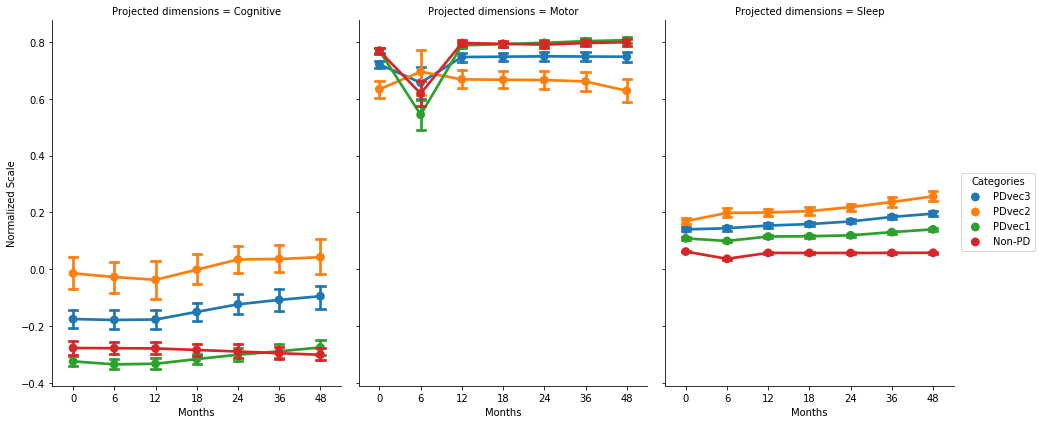

In [95]:
from sklearn.cluster import KMeans
mpl.style.use('default')

# Clustering columns
M_H.T.sort_values(by=[0],ascending=False).head(11)
M_H_T = M_H.T.sort_values(by=[1],ascending=False)

kmeans = KMeans(n_clusters=3, random_state=0).fit(M_H_T)

# Columns 
cog_cols = M_H_T[kmeans.labels_ == 2].index.values.tolist()
mov_cols = M_H_T[kmeans.labels_ == 1].index.values.tolist()
sleep_cols = M_H_T[kmeans.labels_ == 0].index.values.tolist()

cog_cols = np.char.strip(cog_cols)[:,0]#[3:5]
cog_cols = np.delete(cog_cols, [1,5,8]) #  remove ones with reverse direction 1,5,6,7 // ESS5 // attention, visuospatial
mov_cols = np.char.strip(mov_cols)[:,0]
sleep_cols = np.char.strip(sleep_cols)[:,0]

M_cog = M_chosen.loc[:, M_chosen.columns.get_level_values(0).isin(cog_cols)].stack()#.reset_index().set_index('PATNO')
M_mov = M_chosen.loc[:, M_chosen.columns.get_level_values(0).isin(mov_cols)].stack()#.reset_index().set_index('PATNO')
M_sleep = M_chosen.loc[:, M_chosen.columns.get_level_values(0).isin(sleep_cols)].stack()#.reset_index().set_index('PATNO')

#a = pd.concat([M_cog.mean(axis=1)-0.5, M_mov.mean(axis=1), M_sleep.mean(axis=1)], axis=1, join='inner') # normalize scale 
# a = pd.concat([M_cog.mean(axis=1), M_mov.mean(axis=1), M_sleep.mean(axis=1)], axis=1, join='inner')
#a.columns = ['Cognitive', 'Motor', 'Sleep']
#a = a.stack().reset_index().set_index("PATNO")
b = pd.concat([M_label_PD_HC.replace(['HC','PD_l', 'PD_m', 'PD_h'] , 
                                            ['Non-PD','PDvec1', 'PDvec2', 'PDvec3'])
                      , a_months], axis=1, join_axes=[a_months.index])
b.columns = ['Categories', 'Months', 'Projected dimensions', 'Normalized Scale']
# plot
# https://seaborn.pydata.org/examples/pointplot_anova.html
%matplotlib inline
a4_dims = (11.7, 8.27)
g = sns.factorplot(x="Months", y='Normalized Scale', hue="Categories", col='Projected dimensions', data=b,
                   hue_order =['PDvec3', 'PDvec2', 'PDvec1', 'Non-PD'],
                   capsize=0.2,  size=6, aspect=.75)

# g.despine(left=True)
# doesn't replicate appropriately

## 9. Supervised Leaning predicting subtype and progression at baseline with all 140 parameters

/afs/csail.mit.edu/u/c/cji/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


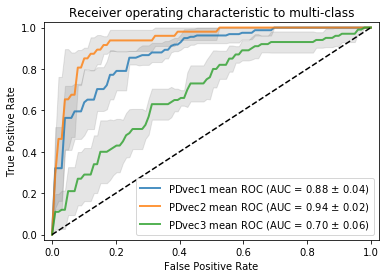

In [64]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics 

X_clinical = M_chosen.ix[M_label_PD.index, M_chosen.columns.get_level_values(1)=='BL'] 
X_clinical = X_clinical.stack().reset_index().set_index('PATNO').drop('EVENT_ID',1)
Y_clinical = M_label_PD.GMM.replace(['HC', 'PD_l', 'PD_m', 'PD_h', 'SWEDD'], ['1', '2', '3', '4', '5'])

X_train, X_test, Y_train, Y_test = train_test_split(X_clinical, Y_clinical, test_size=0.2, random_state=42)


n_classes = len(Y_test.unique())
fpr = dict()
tpr = dict()
roc_auc = dict()

mean_tpr = dict()
mean_fpr = dict()
mean_auc = dict()

cv = StratifiedKFold(n_splits=5)
lr = LogisticRegression()

for k in range(n_classes):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    for train, test in cv.split(X_clinical, Y_clinical):
        preds = lr.fit(X_clinical.iloc[train], Y_clinical.iloc[train]).predict_proba(X_clinical.iloc[test])[:,k]
        label = [1 if int(j) == (k+2) else 0 for j in Y_clinical.iloc[test]] #2,3,4
        fpr, tpr, _ = metrics.roc_curve(label, preds)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        #i += 1 # threw error: str and int can't be concatenated
    
    class_name = 'PDvec1' if k+2==2 else 'PDvec2' if k+2==3 else 'PDvec3' if k+2==4 else 'SWEDD' if k+2==5 else 'NA'
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr,
             label=r'{0} mean ROC (AUC = {1:0.2f} $\pm$ {2:0.2f})'.format(class_name, mean_auc, std_auc),
             lw=2, alpha=.8)
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2)

plt.figure(1, figsize=(9, 5))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.025, 1.025])
plt.ylim([-0.025, 1.025])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

## 10. Find important features from baseline predicting and improving the prediction 
### 10.1 using Recursive Feature Elimination

In [65]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = pd.read_csv(url, names=names)
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]

X = M_chosen.ix[M_label_PD.index, M_chosen.columns.get_level_values(1)=='BL'] 
# X.columns = [' '.join(col).strip() for col in X.columns.values]
Y = M_label_PD.GMM.replace(['HC', 'PD_l', 'PD_m', 'PD_h', 'SWEDD'], ['1', '2', '3', '4', '5'])

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 54) # the magic number of features 
rfe_fit = rfe.fit(X, Y)
print("Num Features:", rfe_fit.n_features_)
print("Selected Features: ", rfe_fit.support_)
print("Feature Ranking: ", rfe_fit.ranking_)
BL_features = X.columns.get_level_values(0)[rfe_fit.support_]
X.columns.get_level_values(0)[rfe_fit.support_]
# X.columns.get_level_values(0)


/afs/csail.mit.edu/u/c/cji/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


('Num Features:', 54)
('Selected Features: ', array([False, False, False, False, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False,  True,
        True,  True, False, False, False,  True,  True, False,  True,
       False,  True,  True,  True, False, False,  True,  True, False,
        True, False, False, False, False,  True,  True, False,  True,
       False, False,  True,  True, False,  True, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True,  True, False,  True, False, False, False, False,
       False, False, False, False, False,  True,  True, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True,  True, False,  True, False, False, False,
       False, False,  True, False, False, Fa

Index([u'NP1SLPN', u'NP1SLPD', u'NP2SPCH', u'NP2DRES', u'NP2HYGN', u'NP2HWRT',
       u'NP2RISE', u'NP2WALK', u'NP3SPCH', u'NP3RIGN', u'NP3RIGRU',
       u'NP3RIGLU', u'NP3FTAPR', u'NP3FTAPL', u'NP3HMOVL', u'NP3LGAGR',
       u'NP3LGAGL', u'NP3GAIT', u'NP3POSTR', u'NP3BRADY', u'NP3PTRML',
       u'NP3KTRML', u'NP3RTALL', u'MCACUBE', u'MCACLCKN', u'MCACLCKH',
       u'MCARHINO', u'MCAREC1', u'MCAREC2', u'MCAREC4', u'MCAREC5', u'MCADATE',
       u'CN346RSP', u'HVLTRT2', u'HVLTRT3', u'HVLTREC', u'TMSEX', u'TMEAT',
       u'CNTRLEAT', u'DRMAGRAC', u'SLPLMBMV', u'SLPINJUR', u'DRMVERBL',
       u'DRMFIGHT', u'DRMUMV', u'DRMOBJFL', u'STROKE', u'DEPRS', u'EPILEPSY',
       u'pupillomotor', u'VLTANIM', u'VLTFRUIT', u'a_state', u'a_trait'],
      dtype='object')

### 10.2 Predicting progression using only RFE parameters

In [66]:
X

,NP1COG,NP1HALL,NP1DPRS,NP1ANXS,NP1APAT,NP1DDS,NP1SLPN,NP1SLPD,NP1PAIN,NP1URIN,...,cardiovascular,thermoregulatory,pupillomotor,skin,VLTANIM,VLTVEG,VLTFRUIT,a_state,a_trait,SDMTOTAL
EVENT_ID,BL,BL,BL,BL,BL,BL,BL,BL,BL,BL,...,BL,BL,BL,BL,BL,BL,BL,BL,BL,BL
PATNO,,,,,,,,,,,,,,,,,,,,,
3001,0.00,0.00,0.00,0.00,0.00,0.000000,0.25,0.50,0.00,1.00,...,0.000000,0.000000,0.0,0.000000,0.394737,0.289474,0.379310,0.103448,0.098039,0.411765
3002,0.25,0.00,0.25,0.00,0.25,0.000000,0.25,0.25,0.00,0.25,...,0.000000,0.000000,0.4,0.500000,0.526316,0.552632,0.551724,0.293103,0.235294,0.401961
3003,0.00,0.00,0.00,0.25,0.00,0.000000,0.75,0.25,0.25,0.75,...,0.146341,0.000000,0.0,0.000000,0.394737,0.394737,0.413793,0.068966,0.137255,0.362745
3010,0.25,0.00,0.00,0.00,0.25,0.000000,1.00,0.25,0.75,0.00,...,0.073171,0.166667,0.0,0.666667,0.315789,0.289474,0.344828,0.275862,0.313725,0.529412
3012,0.25,0.00,0.00,0.25,0.50,0.000000,0.00,0.00,0.25,0.50,...,0.073171,0.166667,0.2,0.000000,0.578947,0.394737,0.413793,0.189655,0.392157,0.431373
3018,0.25,0.00,0.00,0.25,0.00,0.000000,0.25,0.50,0.25,0.25,...,0.000000,0.000000,0.0,0.000000,0.210526,0.394737,0.482759,0.293103,0.588235,0.362745
3023,0.25,0.00,0.25,0.25,0.25,0.000000,0.00,0.50,0.25,0.00,...,0.073171,0.000000,0.0,0.000000,0.526316,0.552632,0.482759,0.068966,0.529412,0.460784
3051,0.00,0.00,0.00,0.00,0.25,0.000000,0.75,0.25,0.00,0.25,...,0.000000,0.166667,0.2,0.000000,0.368421,0.421053,0.413793,0.017241,0.058824,0.362745


In [67]:
Y

PATNO
3001    2
3002    4
3003    4
3010    3
3012    3
3018    4
3023    4
3051    2
3052    2
3054    4
3056    4
3058    3
3059    3
3060    2
3061    4
3062    4
3066    4
3067    4
3068    2
3076    3
3077    3
3078    2
3080    3
3083    2
3086    2
3088    2
3089    2
3102    3
3105    3
3107    4
       ..
4058    3
4059    2
4071    2
4073    4
4077    2
4078    2
4082    2
4083    2
4091    4
4092    2
4093    2
4094    3
4096    3
4098    4
4099    2
4101    2
4102    2
4103    2
4106    2
4107    3
4108    4
4109    2
4110    3
4111    3
4112    2
4113    2
4115    4
4117    2
4123    2
4126    2
Name: GMM, Length: 305, dtype: object

In [68]:
# Edit: X_rfe and Y_rfe never got defined before use in box below
rfe_fit.support_
np.nonzero(rfe_fit.support_)[0]
X.values.shape
X_rfe = X.values[:,np.nonzero(rfe_fit.support_)[0].tolist()]
Y_rfe = Y.values#[np.nonzero(rfe_fit.support_)[0].tolist()]

In [69]:
X_rfe.shape
Y_rfe.shape

(305,)

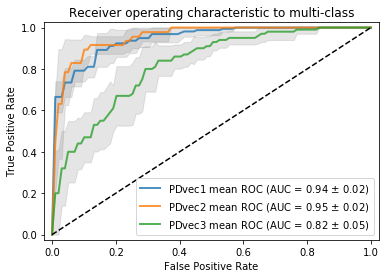

In [70]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics 

n_classes = len(Y_test.unique())
fpr = dict()
tpr = dict()
roc_auc = dict()

mean_tpr = dict()
mean_fpr = dict()
mean_auc = dict()

cv = StratifiedKFold(n_splits=5)
lr = LogisticRegression()

for k in range(n_classes):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    for train, test in cv.split(X_rfe, Y_rfe):
        preds = lr.fit(X_rfe[train], Y_rfe[train]).predict_proba(X_rfe[test])[:,k]
        label = [1 if int(j) == (k+2) else 0 for j in Y_rfe[test]] #2,3,4
        #preds = lr.fit(X_rfe.iloc[train], Y_rfe.iloc[train]).predict_proba(X_rfe.iloc[test])[:,k]
        #label = [1 if int(j) == (k+2) else 0 for j in Y_rfe.iloc[test]] #2,3,4
        fpr, tpr, _ = metrics.roc_curve(label, preds)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        #i += 1
    
    class_name = 'PDvec1' if k+2==2 else 'PDvec2' if k+2==3 else 'PDvec3' if k+2==4 else 'SWEDD' if k+2==5 else 'NA'
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr,
             label=r'{0} mean ROC (AUC = {1:0.2f} $\pm$ {2:0.2f})'.format(class_name, mean_auc, std_auc),
             lw=2, alpha=.8)
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2)

plt.figure(1, figsize=(9, 5))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.025, 1.025])
plt.ylim([-0.025, 1.025])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

## 11. Predicting PD progression from baseline + year 1
### 11.1 Selecting important features using RFE

In [71]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = pd.read_csv(url, names=names)
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]

X = M_chosen.ix[M_label_PD.index, M_chosen.columns.get_level_values(1).isin(['BL', 'V04'])] 
X.columns = [' '.join(col).strip() for col in X.columns.values]

Y = M_label_PD.GMM.replace(['HC', 'PD_l', 'PD_m', 'PD_h', 'SWEDD'], ['1', '2', '3', '4', '5'])

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 73) # the magic number of features 
rfe_fit = rfe.fit(X, Y)
print("Num Features:", rfe_fit.n_features_)
print("Selected Features: ", rfe_fit.support_)
print("Feature Ranking: ", rfe_fit.ranking_)
BL_year1_features = X.columns.get_level_values(0)[rfe_fit.support_]
X.columns.get_level_values(0)[rfe_fit.support_]
# X.columns.get_level_values(0)




/afs/csail.mit.edu/u/c/cji/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


('Num Features:', 73)
('Selected Features: ', array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False,  True, False, False, False, False,  True, False,
       False, False, False,  True, False,  True, False,  True, False,
       False, False,  True, False,  True, False, False,  True, False,
       False,  True,  True, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
        True,  True, False, False, False,  True, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False,  True,  True,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, Fa

Index([u'NP1SLPN V04', u'NP1CNST V04', u'NP2SPCH V04', u'NP2SALV V04',
       u'NP2DRES BL', u'NP2HWRT V04', u'NP2HOBB V04', u'NP2TURN V04',
       u'NP2RISE V04', u'NP2WALK V04', u'NP3SPCH BL', u'NP3FACXP V04',
       u'NP3RIGN BL', u'NP3RIGRU BL', u'NP3RIGLL V04', u'NP3FTAPR BL',
       u'NP3HMOVL BL', u'NP3HMOVL V04', u'NP3PRSPL V04', u'NP3TTAPR V04',
       u'NP3LGAGR BL', u'NP3RISNG V04', u'NP3POSTR BL', u'NP3POSTR V04',
       u'NP3BRADY BL', u'NP3KTRML BL', u'ESS4 V04', u'MCACUBE BL',
       u'MCACLCKN BL', u'MCACLCKH BL', u'MCARHINO V04', u'MCACAMEL V04',
       u'MCAREC1 BL', u'MCAREC1 V04', u'MCAREC2 BL', u'MCAREC3 BL',
       u'MCAREC4 BL', u'MCAREC5 BL', u'MCAREC5 V04', u'MCADATE BL',
       u'MCADATE V04', u'CN346RSP BL', u'total V04', u'HVLTRT1 V04',
       u'HVLTRT3 BL', u'HVLTRT3 V04', u'HVLTREC V04', u'TMGAMBLE V04',
       u'TMSEX BL', u'TMEAT BL', u'CNTRLEAT BL', u'CNTRLEAT V04',
       u'DRMVIVID V04', u'DRMAGRAC BL', u'DRMAGRAC V04', u'SLPLMBMV V04',
       u'SLPIN

### 11.2 Predictive model on RFE

/afs/csail.mit.edu/u/c/cji/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


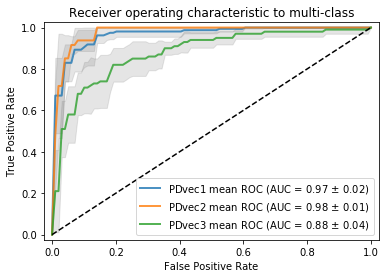

In [72]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics 

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_rfe = X.ix[:,X.columns.get_level_values(0)[rfe_fit.support_]]

# X_rfe = X_rfe.stack().reset_index().set_index('PATNO').drop('EVENT_ID',1)
X_rfe
Y_rfe = M_label_PD.GMM.replace(['HC', 'PD_l', 'PD_m', 'PD_h', 'SWEDD'], ['1', '2', '3', '4', '5'])

X_train, X_test, Y_train, Y_test = train_test_split(X_rfe, Y_rfe, test_size=0.2, random_state=42)


n_classes = len(Y_test.unique())
fpr = dict()
tpr = dict()
roc_auc = dict()

mean_tpr = dict()
mean_fpr = dict()
mean_auc = dict()

cv = StratifiedKFold(n_splits=5)
lr = LogisticRegression()

for k in range(n_classes):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    for train, test in cv.split(X_rfe, Y_rfe):
        preds = lr.fit(X_rfe.iloc[train], Y_rfe.iloc[train]).predict_proba(X_rfe.iloc[test])[:,k]
        label = [1 if int(j) == (k+2) else 0 for j in Y_rfe.iloc[test]] #2,3,4
        fpr, tpr, _ = metrics.roc_curve(label, preds)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        #i += 1
    
    class_name = 'PDvec1' if k+2==2 else 'PDvec2' if k+2==3 else 'PDvec3' if k+2==4 else 'SWEDD' if k+2==5 else 'NA'
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr,
             label=r'{0} mean ROC (AUC = {1:0.2f} $\pm$ {2:0.2f})'.format(class_name, mean_auc, std_auc),
             lw=2, alpha=.8)
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2)

plt.figure(1, figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.025, 1.025])
plt.ylim([-0.025, 1.025])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

## 12. Storing models for Replication in PDBP

NMF results for plotting only baseline 

In [141]:
model_NMF_baseline = decomposition.NMF(n_components=2, init='nndsvda', max_iter=200)
model_NMF3_baseline = decomposition.NMF(n_components=3, init='nndsvda', max_iter=200)
model_NMF4_baseline = decomposition.NMF(n_components=4, init='nndsvda', max_iter=200)

X = M_chosen.ix[M_label_PD.index, M_chosen.columns.get_level_values(1)=='BL'] 
X = X.stack().reset_index().set_index('PATNO').drop('EVENT_ID',1)
Y = M_label_PD.GMM.replace(['HC', 'PD_l', 'PD_m', 'PD_h', 'SWEDD'], ['1', '2', '3', '4', '5'])


baseline_nmf2d = model_NMF_baseline.fit_transform(X)
baseline_nmf3d = model_NMF3_baseline.fit_transform(X)
baseline_nmf4d = model_NMF4_baseline.fit_transform(X)


%store baseline_nmf2d
%store baseline_nmf3d

Stored 'baseline_nmf2d' (ndarray)
Stored 'baseline_nmf3d' (ndarray)


In [167]:
X = baseline_nmf3d
Y = M_label_PD.GMM.replace(['HC', 'PD_l', 'PD_m', 'PD_h', 'SWEDD'], ['1', '2', '3', '4', '5'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [168]:
clf_replication = RandomForestClassifier(n_estimators = 250)


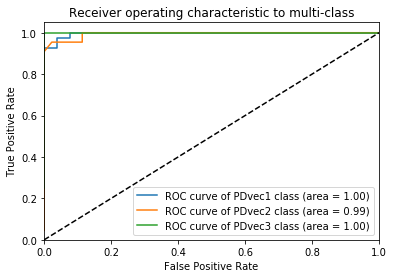

In [145]:
# plot ROC
# ref: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
from sklearn import metrics 
n_classes = len(Y_test.unique())
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    preds = clf_replication.predict_proba(X_test)[:,i]
    label = [1 if int(j) == (i+2) else 0 for j in Y_test] #2,3,4
    fpr[i], tpr[i], _ = metrics.roc_curve(label, preds)
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    class_name = 'PDvec1' if i+2==2 else 'PDvec2' if i+2==3 else 'PDvec3' if i+2==4 else 'SWEDD' if i+2==5 else 'NA'
    plt.plot(fpr[i], tpr[i], label='ROC curve of {0} class (area = {1:0.2f})'
                                   ''.format(class_name, roc_auc[i]))

# Compute micro-average ROC curve and ROC area
# y_score = lr.predict(X_test)
# fpr["micro"], tpr["micro"], _ = metrics.roc_curve(Y_test.ravel(), y_score.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(1, figsize=(8, 4))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
%store clf_replication